# Self Organizing Maps

In [147]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [149]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [150]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

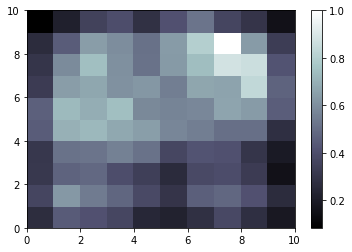

In [151]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

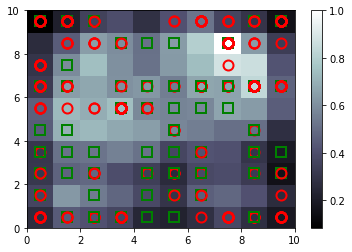

In [152]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [153]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,7)], mappings[(2,9)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15776156.0
15768295.0
15783859.0
15713983.0
15753550.0
15745804.0
15724851.0
15810485.0
15788224.0
15787229.0
15759133.0
15713160.0
15735330.0
15758477.0
15796413.0
15776921.0
15655464.0
15706637.0
15726167.0
15707042.0
15741633.0
15666297.0
15611794.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised with PCA.
Training SOM... done!


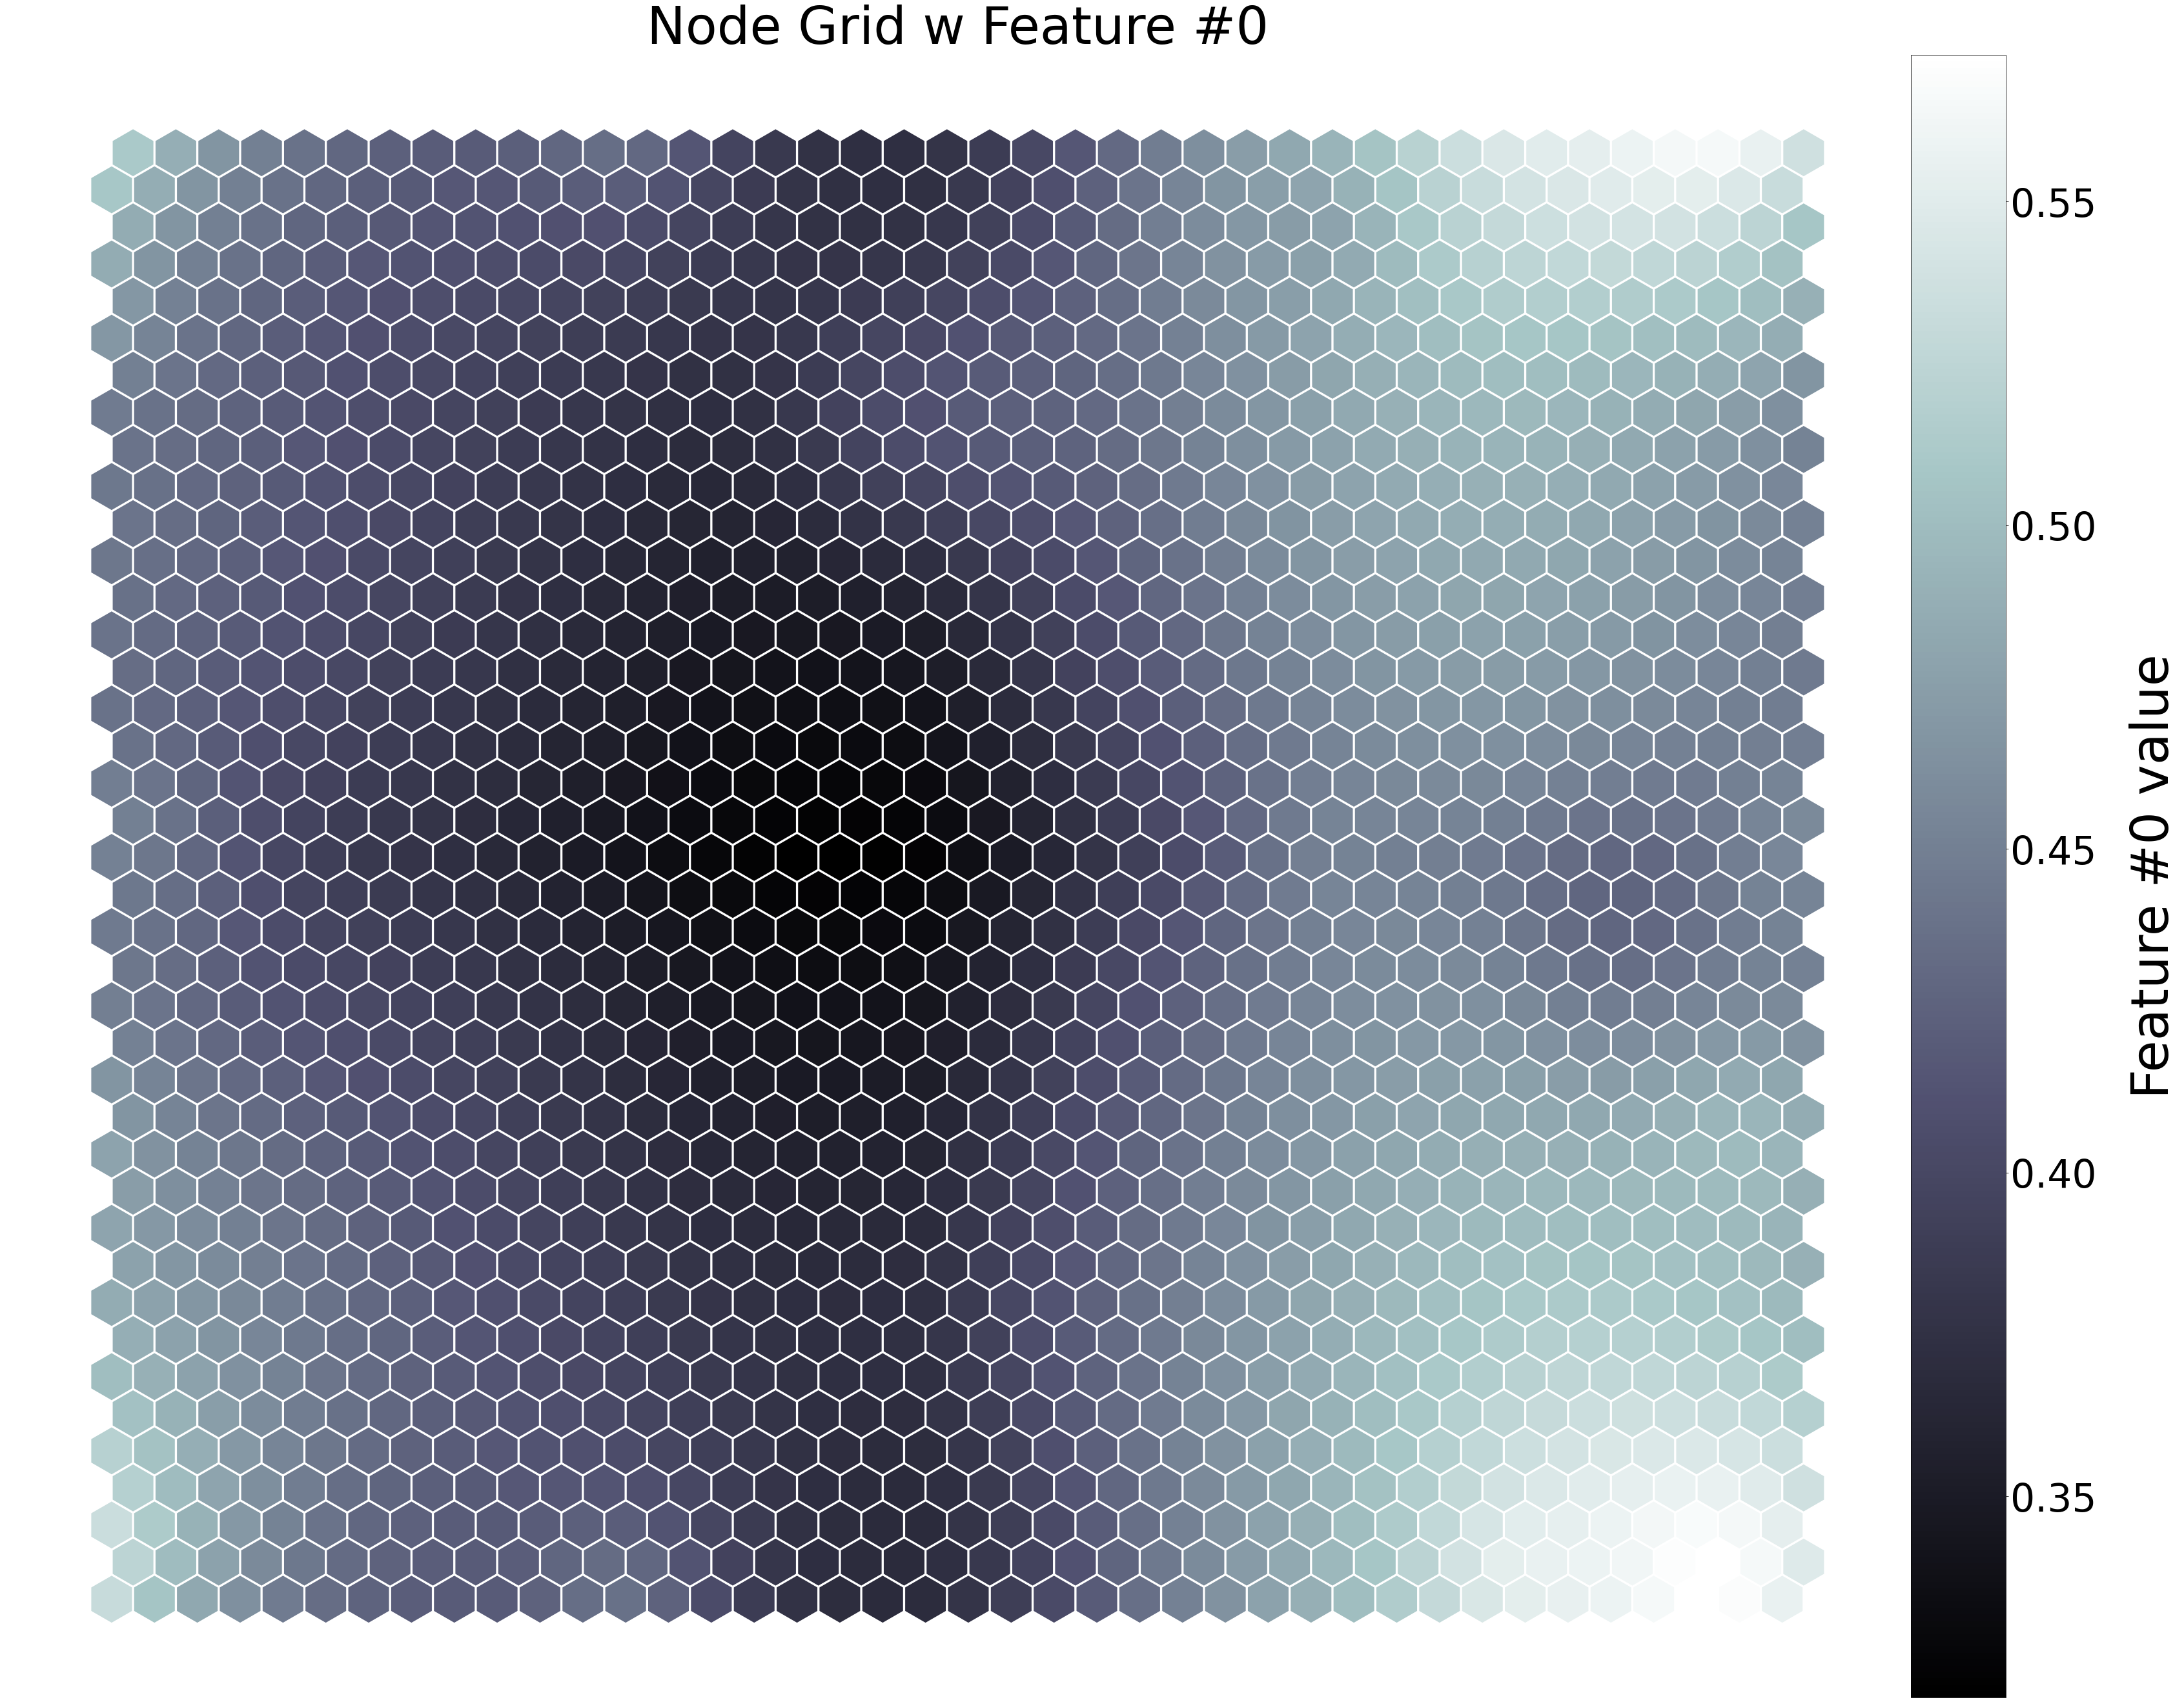

In [166]:
# ! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(40, 40, X, PBC=True, PCI=True)
net.train(0.1, 100)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

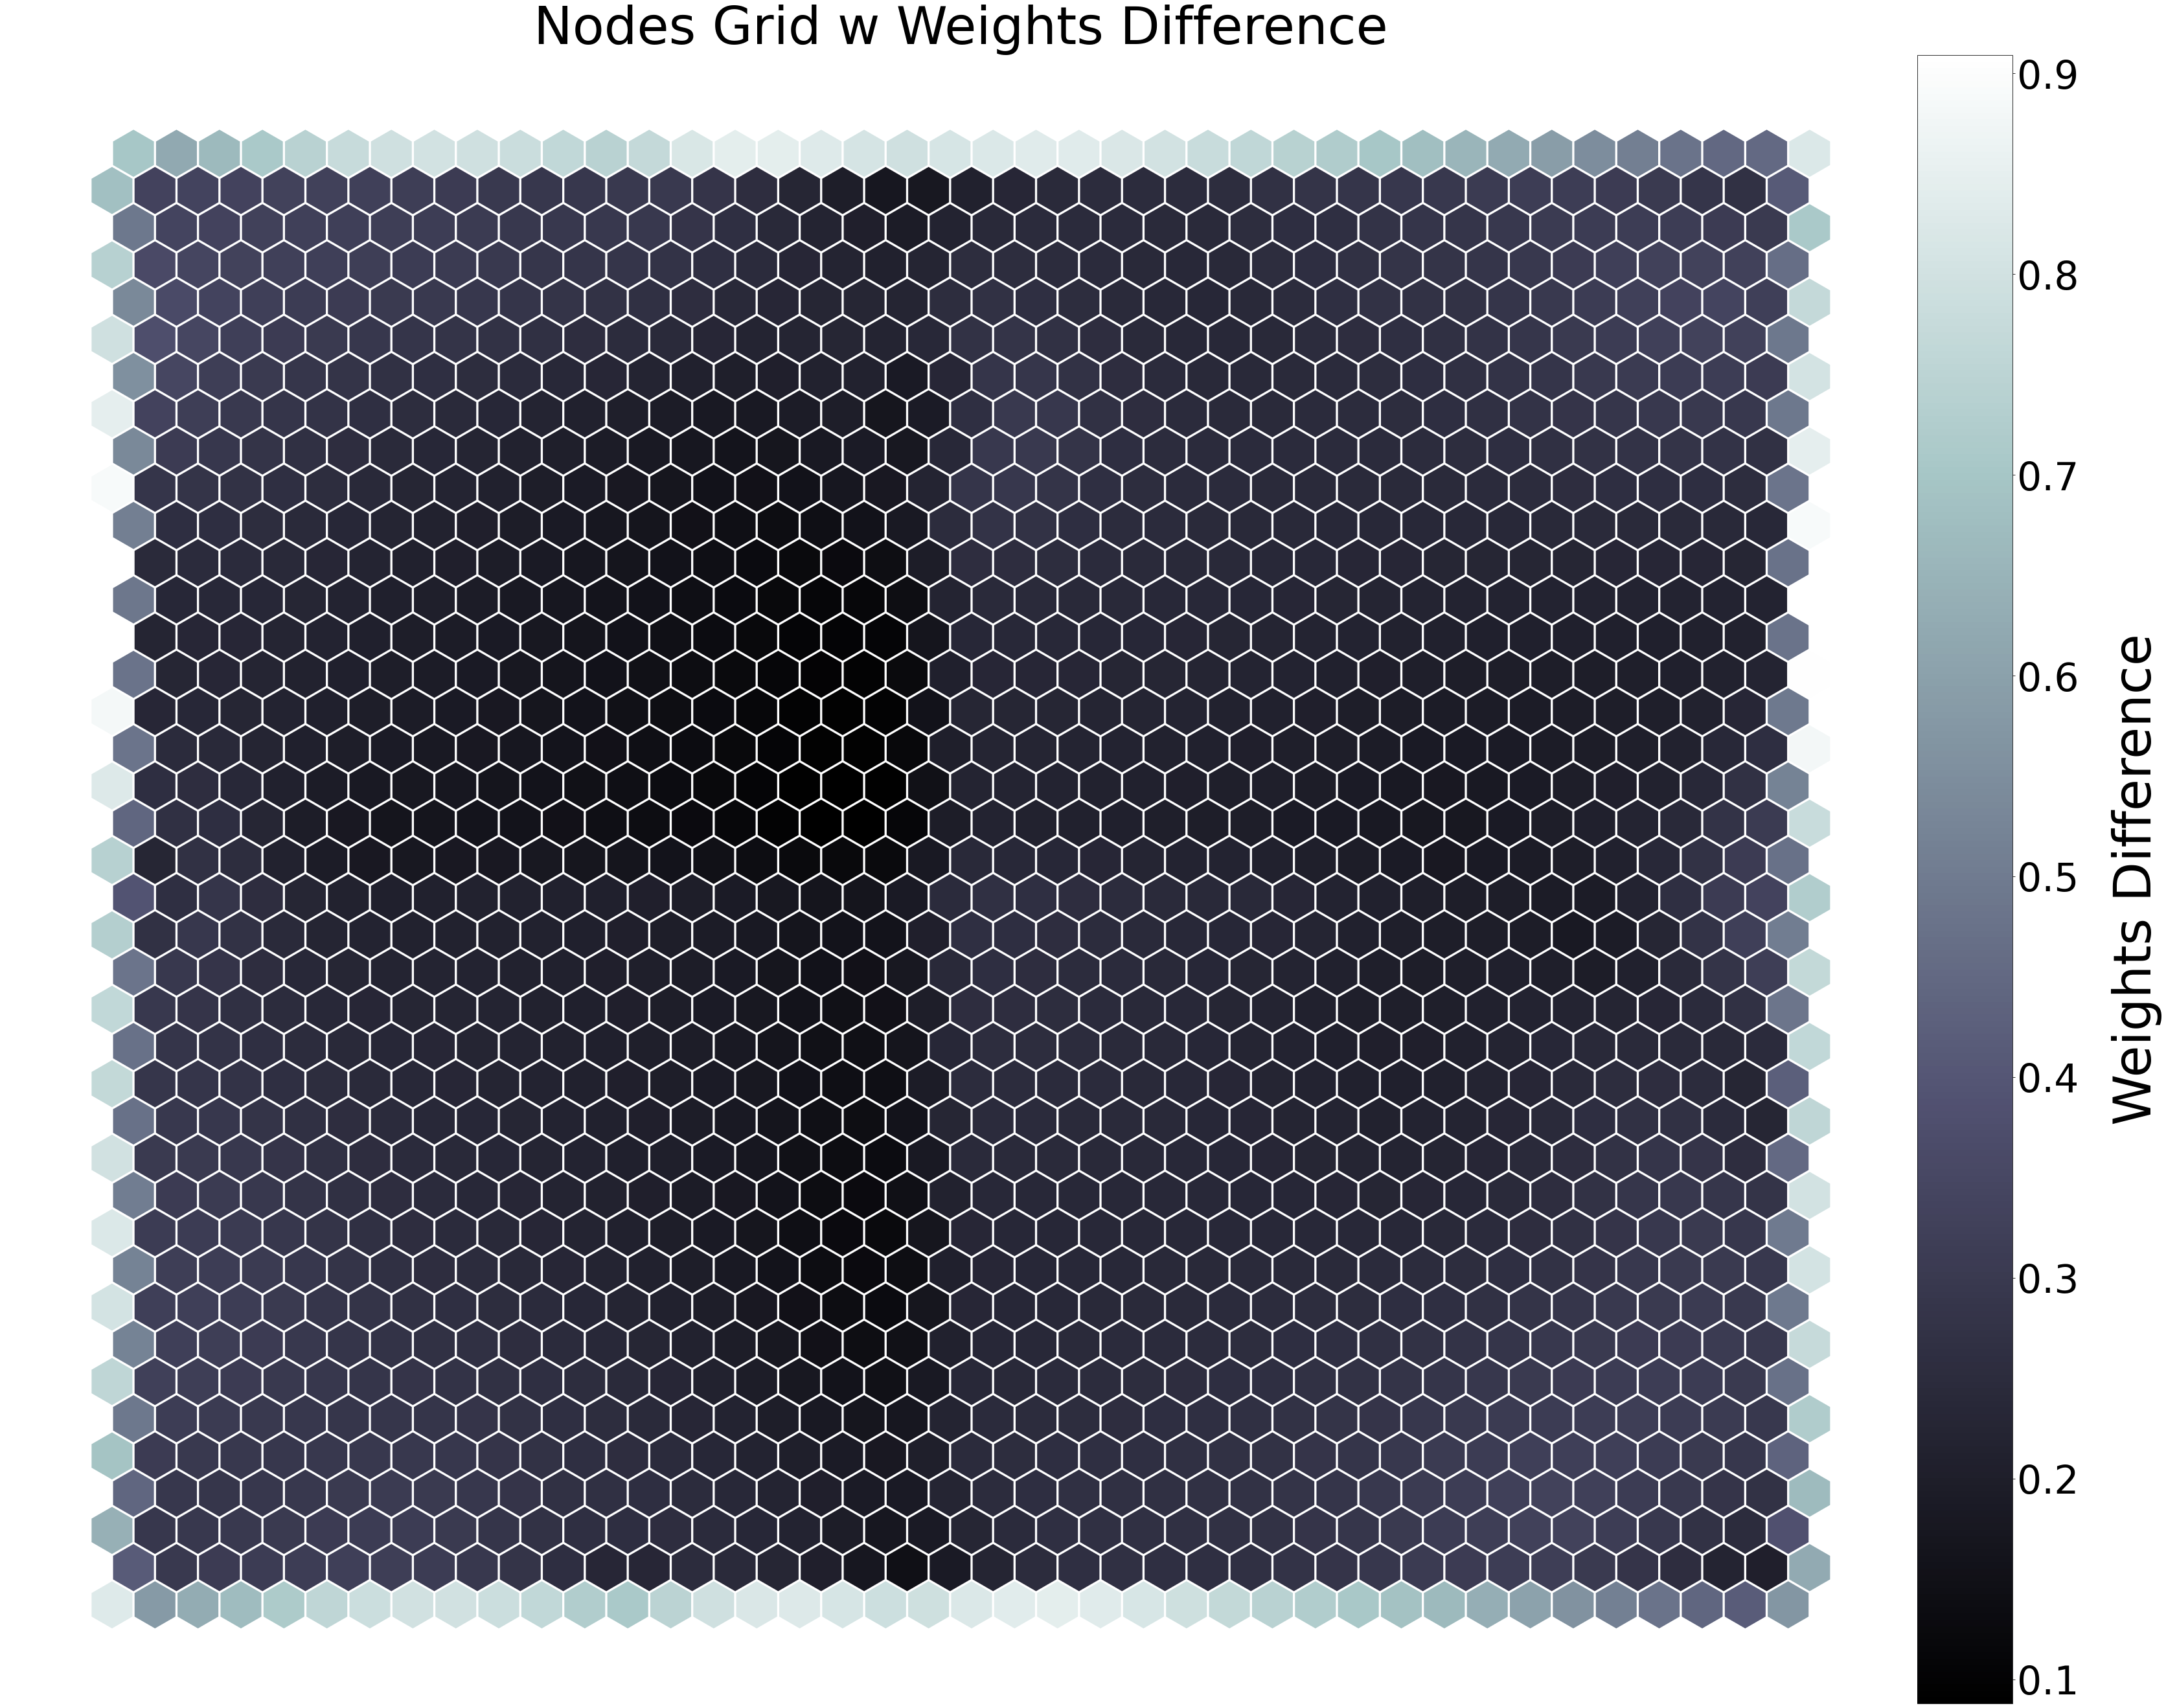

<Figure size 432x288 with 0 Axes>

In [167]:
net.diff_graph(show=True,printout=True)

In [156]:
#Project the datapoints on the new 2D network map.
net_project = net.project(X)

<Figure size 432x288 with 0 Axes>

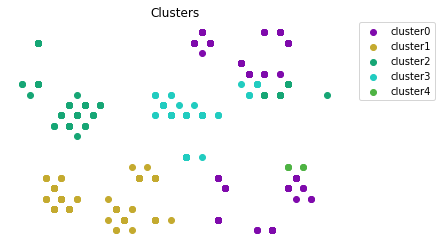

<Figure size 432x288 with 0 Axes>

In [158]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net_cluster = net.cluster(X, type='qthresh', show=True)

In [161]:
net_project

[[3, 10.392304845413264],
 [6.5, 0.8660254037844388],
 [7.5, 4.330127018922194],
 [11.5, 16.454482671904337],
 [16, 0.0],
 [12.5, 0.8660254037844388],
 [3, 1.7320508075688776],
 [12.5, 0.8660254037844388],
 [2.5, 4.330127018922194],
 [11, 15.588457268119896],
 [14.5, 12.99038105676658],
 [14.5, 12.99038105676658],
 [14.5, 11.258330249197702],
 [14, 13.856406460551021],
 [4, 8.660254037844387],
 [3, 1.7320508075688776],
 [15.5, 12.99038105676658],
 [12.5, 0.8660254037844388],
 [2, 1.7320508075688776],
 [12.5, 0.8660254037844388],
 [6.5, 0.8660254037844388],
 [10.5, 6.062177826491071],
 [3, 1.7320508075688776],
 [17, 3.4641016151377553],
 [2.5, 2.598076211353316],
 [14.5, 12.99038105676658],
 [2, 1.7320508075688776],
 [14.5, 11.258330249197702],
 [12.5, 0.8660254037844388],
 [17, 12.124355652982143],
 [15, 12.124355652982143],
 [7.5, 4.330127018922194],
 [11.5, 9.526279441628825],
 [14.5, 12.99038105676658],
 [0.5, 11.258330249197702],
 [1, 15.588457268119896],
 [9, 10.392304845413264],


In [168]:
def autocrop(fileName):
    im = Image.open(fileName)
    im=im.crop((0,100,2900,im.size[1]))
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

def posMap(x,y):
     if y%2==0:
        return [y, x*2/np.sqrt(3)*3/4]
     else:
        return [y+0.5, x*2/np.sqrt(3)*3/4]
    
def posCount(x,y):
     return y*40+x

def posCountR(x):
     return [np.int(x%40),np.int(x/40)]

In [176]:
listNodes=[[20,0],[23,11],[1,6],[13,37],[7,33],[18,31]]
listCount=[posCount(20,0), posCount(23,11), posCount(1,6), posCount(13,37), posCount(7,33), posCount(18,31)]

i=0
for node in net.nodeList:
    if i in listCount:
        print('Node\'s position: {:d} {:d}'.format(posCountR(i)[1], posCountR(i)[0]) )
        plt.imshow(np.asarray(node.weights).reshape(1,1))
        plt.axis('off')
        plt.show()
    i+=1

Node's position: 0 20


ValueError: cannot reshape array of size 15 into shape (1,1)

In [170]:
projData=net.project(X[:500])

<Figure size 432x288 with 0 Axes>

In [178]:
from PIL import Image, ImageChops

cropped = autocrop('nodesDifference.png')
cropped.save('cropped.png')

In [185]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.preprocessing import StandardScaler

In [186]:
trace0 = go.Scatter(
    x = [x for x,y in projData],
    y = [y for x,y in projData],
#    name = X,
    hoveron = [str(n) for n in X],
    text = [str(n) for n in X],
    mode = 'markers',
    marker = dict(
        size = 8,
        color = X,
        colorscale ='Jet',
        showscale = False,
        opacity = 1
    ),
    showlegend = False

)
data = [trace0]

layout = go.Layout(
    images= [dict(
                  source= "cropped.png",
                  xref= "x",
                  yref= "y",
                  x= -0.5,
                  y= 39.5*2/np.sqrt(3)*3/4,
                  sizex= 40.5,
                  sizey= 40*2/np.sqrt(3)*3/4,
                  sizing= "stretch",
                  opacity= 0.5,
                  layer= "below")],
    width = 800,
    height = 800,
    hovermode= 'closest',
    xaxis= dict(
        range=[-1,41],
        zeroline=False,
        showgrid=False,
        ticks='',
        showtickX=False
    ),
    yaxis=dict(
        range=[-1,41],
        zeroline=False,
        showgrid=False,
        ticks='',
        showtickX=False
    ),
    showlegend= True
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

ValueError: 
    Invalid value of type 'builtins.list' received for the 'hoveron' property of scatter
        Received value: ['[0.84268147 1.         0.12526316 0.40928571 0.5        0.23076923\n 0.375      0.05561404 0.         0.         0.         1.\n 0.5        0.05       0.01212   ]', '[0.69609056 0.         0.13413534 0.25       0.5        0.53846154\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.08       0.        ]', '[0.38898166 0.         0.23804511 0.0625     0.         0.23076923\n 0.375      0.04385965 0.         0.         0.         1.\n 0.5        0.14       0.        ]', '[0.48842545 0.         0.11909774 0.41071429 0.         0.30769231\n 0.25       0.         1.         1.         0.1641791  1.\n 0.5        0.         0.        ]', '[0.60079526 1.         0.09654135 0.29178571 0.5        0.38461538\n 0.375      0.06877193 1.         1.         0.20895522 0.\n 0.5        0.03       0.00158   ]', '[0.02165147 0.         0.0312782  0.02089286 0.5        0.53846154\n 0.875      0.05263158 1.         1.         0.02985075 0.\n 0.5        0.05       0.        ]', '[0.64370578 1.         0.05518797 0.23214286 0.5        0.15384615\n 0.375      0.00438596 0.         0.         0.         0.\n 0.5        0.03       0.001     ]', '[0.37911496 0.         0.67548872 0.15928571 0.5        0.76923077\n 0.875      0.10666667 1.         1.         0.08955224 0.\n 0.5        0.0215     0.0056    ]', '[0.39333838 1.         0.21172932 0.03571429 0.         0.07692308\n 0.875      0.10526316 0.         0.         0.         0.\n 0.5        0.088      0.00537   ]', '[2.91900420e-01 0.00000000e+00 6.31578947e-01 2.52857143e-01\n 5.00000000e-01 2.30769231e-01 8.75000000e-01 2.36842105e-01\n 1.00000000e+00 1.00000000e+00 4.47761194e-02 1.00000000e+00\n 5.00000000e-01 5.00000000e-02 5.00000000e-04]', '[0.31526975 1.         0.29699248 0.0625     0.5        1.\n 0.875      0.15789474 1.         1.         0.05970149 1.\n 0.5        0.1265     0.00857   ]', '[0.08079959 1.         0.41609023 0.17857143 0.5        0.76923077\n 0.875      0.1754386  1.         1.         0.08955224 1.\n 0.5        0.235      0.        ]', '[0.17475744 1.         0.10406015 0.04464286 0.         0.53846154\n 0.875      0.04824561 1.         1.         0.04477612 1.\n 0.5        0.07       0.0021    ]', '[0.95168763 1.         0.31834586 0.17857143 0.5        1.\n 0.875      0.26315789 1.         1.         0.08955224 1.\n 0.5        0.         0.01      ]', '[0.13505039 1.         0.67413534 0.09678571 0.5        0.53846154\n 0.375      0.08473684 0.         0.         0.         1.\n 0.5        0.16       0.        ]', '[0.50732594 1.         0.5162406  0.21571429 0.5        0.23076923\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.         0.0269    ]', '[0.47032583 1.         0.23804511 0.16071429 0.5        0.61538462\n 0.375      0.26315789 1.         1.         0.02985075 1.\n 0.5        0.165      0.        ]', '[0.89913466 0.         0.07774436 0.32142857 0.5        0.38461538\n 0.375      0.02631579 1.         1.         0.02985075 0.\n 0.5        0.044      0.00591   ]', '[8.08936888e-01 1.00000000e+00 9.39849624e-02 4.46428571e-02\n 0.00000000e+00 2.30769231e-01 3.75000000e-01 4.38596491e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 7.00000000e-02 4.00000000e-05]', '[0.81242467 0.         0.13037594 0.20232143 0.5        0.76923077\n 0.375      0.09070175 1.         1.         0.10447761 0.\n 0.5        0.0645     0.03257   ]', '[0.5370822  0.         0.21684211 0.02089286 0.5        0.38461538\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.13       0.01004   ]', '[0.88304923 0.         0.08150376 0.02089286 0.         0.38461538\n 0.375      0.02052632 1.         0.         0.         1.\n 0.5        0.08       0.        ]', '[0.51582315 1.         0.41233083 0.04767857 0.5        0.07692308\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.084      0.        ]', '[0.92539913 1.         0.41849624 0.0625     0.5        0.23076923\n 0.375      0.00736842 1.         0.         0.         0.\n 0.5        0.08       0.        ]', '[0.16048196 1.         0.08646617 0.34232143 0.5        0.38461538\n 0.375      0.0277193  0.         0.         0.         0.\n 0.5        0.04       0.0035    ]', '[0.59413604 1.         0.28571429 0.05357143 0.5        0.92307692\n 0.875      0.19298246 1.         1.         0.04477612 1.\n 0.5        0.         0.        ]', '[5.83560580e-01 1.00000000e+00 1.31578947e-01 4.46428571e-03\n 0.00000000e+00 2.30769231e-01 3.75000000e-01 4.38596491e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.00000000e-01 7.00000000e-04]', '[0.08973327 1.         0.29203008 0.10857143 0.         0.53846154\n 0.875      0.07157895 1.         1.         0.01492537 1.\n 0.5        0.09       0.18027   ]', '[7.32145646e-01 0.00000000e+00 2.54436090e-01 4.28571429e-01\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 7.01754386e-02\n 1.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 1.10000000e-01 1.90000000e-04]', '[0.21101274 1.         0.14030075 0.08928571 0.5        0.53846154\n 0.375      0.03807018 1.         1.         0.1641791  1.\n 0.5        0.03       0.02184   ]', '[0.42733523 1.         0.19924812 0.02678571 0.5        0.53846154\n 0.875      0.14912281 1.         1.         0.04477612 1.\n 0.5        0.156      0.0015    ]', '[1.77504415e-01 0.00000000e+00 1.00300752e-01 3.75000000e-01\n 0.00000000e+00 1.00000000e+00 8.75000000e-01 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 7.70000000e-02 3.20000000e-04]', '[0.06086598 1.         0.58015038 0.04910714 0.         0.53846154\n 0.875      0.33192982 1.         0.         0.         1.\n 0.5        0.1        0.001     ]', '[0.07194199 1.         0.14030075 0.41071429 0.5        0.61538462\n 0.875      0.0745614  1.         1.         0.1641791  1.\n 0.5        0.145      0.00284   ]', '[0.99309251 1.         0.43729323 0.04464286 0.5        0.46153846\n 0.375      0.48684211 0.         1.         0.01492537 1.\n 0.5        0.176      0.00112   ]', '[0.80707487 1.         0.91849624 0.67857143 0.         0.\n 0.         0.00140351 0.         1.         0.02985075 0.\n 0.5        0.         0.00351   ]', '[0.48351213 1.         0.16917293 0.44642857 0.5        0.38461538\n 0.375      0.10526316 1.         0.         0.         1.\n 0.         0.01       0.        ]', '[0.45316323 1.         0.38842105 0.49696429 0.5        0.61538462\n 0.375      0.30263158 1.         1.         0.08955224 1.\n 0.5        0.035      0.        ]', '[0.89655987 0.         0.5112782  0.28571429 0.5        0.53846154\n 0.375      0.27631579 1.         1.         0.08955224 1.\n 0.5        0.         0.0126    ]', '[0.41230694 0.         0.50631579 0.10714286 0.5        1.\n 0.375      0.48684211 1.         1.         0.02985075 1.\n 0.5        0.2595     0.01704   ]', '[0.26417036 1.         0.14165414 0.         0.5        0.92307692\n 0.375      0.00298246 1.         0.         0.         0.\n 0.5        0.         0.        ]', '[3.60166420e-01 1.00000000e+00 1.32781955e-01 5.35714286e-02\n 0.00000000e+00 3.84615385e-01 3.75000000e-01 1.89473684e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 6.00000000e-02 6.70000000e-04]', '[0.75232352 1.         0.19548872 0.04017857 0.5        1.\n 0.875      0.04385965 1.         0.         0.         0.\n 0.5        0.         0.05298   ]', '[0.20676013 1.         0.74556391 0.01928571 0.5        0.53846154\n 0.375      0.02052632 1.         1.         0.04477612 1.\n 0.5        0.09       0.        ]', '[5.56070781e-01 1.00000000e+00 1.50375940e-01 1.48214286e-02\n 0.00000000e+00 5.38461538e-01 3.75000000e-01 1.40350877e-03\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 0.00000000e+00\n 5.00000000e-01 6.40000000e-02 6.00000000e-05]', '[0.69184196 0.         0.10526316 0.36607143 0.5        0.76923077\n 0.375      0.02491228 1.         1.         0.02985075 1.\n 0.5        0.0245     0.        ]', '[0.32977748 0.         0.16165414 0.0625     0.         0.53846154\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.066      0.        ]', '[0.68839822 1.         0.03639098 0.00142857 0.5        0.53846154\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.         0.        ]', '[6.64208001e-01 0.00000000e+00 2.36842105e-01 7.14285714e-02\n 0.00000000e+00 6.92307692e-01 8.75000000e-01 7.01754386e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.28000000e-01 1.70000000e-04]', '[0.76784434 0.         0.58766917 0.53571429 0.5        0.53846154\n 0.375      0.19298246 1.         1.         0.20895522 0.\n 0.5        0.         0.022     ]', '[0.12811888 1.         0.2793985  0.125      0.5        0.23076923\n 0.375      0.01754386 0.         0.         0.         1.\n 0.5        0.116      0.        ]', '[0.61993201 1.         0.11022556 0.14732143 0.         0.15384615\n 0.875      0.00140351 0.         0.         0.         0.\n 0.5        0.07       0.001     ]', '[0.12446692 1.         0.21684211 0.00446429 0.         0.23076923\n 0.375      0.00298246 0.         0.         0.         0.\n 0.5        0.108      0.021     ]', '[4.64667700e-01 1.00000000e+00 7.89473684e-02 6.25000000e-02\n 0.00000000e+00 5.38461538e-01 3.75000000e-01 8.19298246e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 5.60000000e-02 6.00000000e-05]', '[9.99311253e-01 1.00000000e+00 2.07969925e-01 1.16071429e-01\n 0.00000000e+00 7.69230769e-01 8.75000000e-01 1.78421053e-01\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 1.00000000e+00\n 5.00000000e-01 1.84500000e-01 1.00000000e-05]', '[4.69092496e-01 1.00000000e+00 2.11729323e-01 5.35714286e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 7.01754386e-02\n 1.00000000e+00 1.00000000e+00 1.64179104e-01 1.00000000e+00\n 5.00000000e-01 2.17000000e-01 3.50000000e-04]', '[0.22357035 1.         0.39473684 0.23214286 0.5        0.38461538\n 0.5        0.12280702 1.         1.         0.01492537 0.\n 0.5        0.         0.005     ]', '[0.56142458 0.         0.35458647 0.08928571 0.5        0.15384615\n 0.875      0.00736842 0.         0.         0.         0.\n 0.5        0.13       0.00246   ]', '[0.47570767 1.         0.43233083 0.17553571 0.         0.61538462\n 0.375      0.11105263 1.         0.         0.         1.\n 0.5        0.026      0.01442   ]', '[0.42468035 1.         0.64661654 0.4375     0.5        0.46153846\n 0.375      0.04385965 1.         1.         0.05970149 1.\n 0.5        0.1        0.        ]', '[0.30921519 1.         0.44240602 0.17857143 0.5        0.15384615\n 0.5        0.07894737 0.         0.         0.         1.\n 0.5        0.0705     0.        ]', '[1.14488105e-01 0.00000000e+00 1.50375940e-01 2.53571429e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 8.77192982e-03\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 1.20000000e-01 4.00000000e-05]', '[0.89491809 1.         0.07142857 0.07142857 0.5        0.15384615\n 0.375      0.05263158 1.         1.         0.02985075 0.\n 0.5        0.06       0.003     ]', '[0.56480425 0.         0.40721805 0.125      0.5        0.15384615\n 0.5        0.01754386 0.         0.         0.         0.\n 0.         0.58       0.        ]', '[0.80274618 0.         0.16165414 0.01785714 0.5        0.76923077\n 0.875      0.05263158 1.         0.         0.         0.\n 0.5        0.14       0.00824   ]', '[0.85004144 1.         0.42481203 0.34964286 0.5        1.\n 0.875      0.27929825 1.         1.         0.11940299 0.\n 0.5        0.         0.        ]', '[0.00980263 0.         0.08646617 0.00589286 0.5        0.76923077\n 0.375      0.00140351 0.         0.         0.         1.\n 0.5        0.19       0.        ]', '[4.60214873e-01 1.00000000e+00 1.16541353e-01 4.10714286e-01\n 5.00000000e-01 1.53846154e-01 3.75000000e-01 1.75438596e-02\n 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 5.00000000e-02 6.80000000e-04]', '[0.78541139 1.         0.26315789 0.10125    0.5        0.\n 0.         0.         0.         1.         0.07462687 0.\n 0.5        0.088      0.00146   ]', '[0.66103256 1.         0.20300752 0.05660714 0.5        0.92307692\n 0.875      0.06438596 1.         1.         0.17910448 1.\n 0.5        0.2915     0.00713   ]', '[0.50624076 1.         0.52631579 0.94053571 0.         0.\n 0.         0.         1.         0.         0.         1.\n 0.5        0.         0.        ]', '[1.71710134e-01 0.00000000e+00 2.50676692e-01 4.91071429e-02\n 5.00000000e-01 6.15384615e-01 8.75000000e-01 1.40350877e-03\n 0.00000000e+00 1.00000000e+00 4.47761194e-02 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 3.30000000e-04]', '[0.57560395 1.         0.2356391  0.04464286 0.5        0.61538462\n 0.375      0.06140351 0.         0.         0.         0.\n 0.5        0.1        0.        ]', '[8.41055704e-01 1.00000000e+00 2.18045113e-01 1.80000000e-01\n 0.00000000e+00 5.38461538e-01 5.00000000e-01 5.26315789e-02\n 1.00000000e+00 1.00000000e+00 1.19402985e-01 1.00000000e+00\n 5.00000000e-01 7.20000000e-02 7.00000000e-05]', '[0.08065143 1.         0.39849624 0.76785714 0.5        0.69230769\n 1.         0.70175439 1.         1.         0.1641791  0.\n 0.5        0.         0.012     ]', '[7.46509216e-01 1.00000000e+00 3.42105263e-01 1.51785714e-01\n 5.00000000e-01 7.69230769e-01 3.75000000e-01 1.22807018e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 2.27000000e-01 5.00000000e-04]', '[0.81120334 1.         0.17789474 0.01196429 0.5        0.23076923\n 0.875      0.12280702 0.         0.         0.         1.\n 0.5        0.17       0.        ]', '[0.80564132 1.         0.24180451 0.125      0.5        0.53846154\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.108      0.        ]', '[0.64094278 1.         0.14030075 0.         0.5        0.23076923\n 0.375      0.03508772 0.         1.         0.1641791  0.\n 0.         0.         0.        ]', '[0.46795526 0.         0.27699248 0.05214286 0.5        0.61538462\n 0.375      0.03807018 1.         1.         0.23880597 0.\n 0.5        0.06       0.02079   ]', '[0.55406861 1.         0.17172932 0.125      0.5        0.92307692\n 0.375      0.02192982 1.         1.         0.10447761 0.\n 0.5        0.         0.07059   ]', '[0.61757345 0.         0.32210526 0.13392857 0.5        0.\n 0.         0.         0.         1.         0.08955224 0.\n 0.5        0.         0.002     ]', '[4.29185237e-01 0.00000000e+00 7.26315789e-02 3.57142857e-01\n 5.00000000e-01 7.69230769e-02 3.75000000e-01 1.45614035e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 4.00000000e-02 4.20000000e-04]', '[0.40738961 1.         0.39353383 0.17857143 0.5        0.15384615\n 0.5        0.00736842 0.         0.         0.         0.\n 0.5        0.275      0.        ]', '[0.28452042 1.         0.14541353 0.03571429 0.5        0.53846154\n 0.375      0.01754386 0.         0.         0.         1.\n 0.         0.14       0.        ]', '[0.02282875 1.         0.35834586 0.         0.5        0.53846154\n 0.375      0.         0.         0.         0.         0.\n 1.         0.092      0.        ]', '[3.96069339e-02 0.00000000e+00 1.65413534e-01 4.88035714e-01\n 5.00000000e-01 7.69230769e-01 8.75000000e-01 5.26315789e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.40000000e-01 1.00000000e-05]', '[0.33414621 0.         0.5        0.46428571 0.5        0.15384615\n 0.5        0.18122807 1.         1.         0.13432836 1.\n 0.5        0.         0.        ]', '[2.00689547e-01 1.00000000e+00 3.07067669e-01 1.87500000e-01\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 2.98245614e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.45000000e-01 6.00000000e-05]', '[0.14119706 1.         0.12661654 0.02089286 0.         0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.50077484 1.         0.21052632 0.04607143 0.5        0.23076923\n 0.875      0.00877193 0.         0.         0.         1.\n 0.         0.07       0.        ]', '[0.         1.         0.43609023 0.14589286 0.5        0.38461538\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.054      0.001     ]', '[0.79043283 1.         0.2243609  0.51785714 0.5        0.07692308\n 0.375      0.00438596 0.         0.         0.         0.\n 0.5        0.         0.00286   ]', '[0.63336657 1.         0.33834586 0.17857143 0.5        0.53846154\n 0.5        0.0877193  1.         1.         0.08955224 0.\n 0.5        0.         0.00367   ]', '[0.31529778 0.         0.06646617 0.35714286 0.         0.76923077\n 0.875      0.00578947 0.         0.         0.         0.\n 0.5        0.17       0.        ]', '[3.59389578e-01 1.00000000e+00 1.12781955e-01 5.35714286e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 5.26315789e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 7.50000000e-02 8.00000000e-05]', '[0.87362301 0.         0.37849624 0.05946429 0.5        0.38461538\n 0.375      0.00877193 0.         0.         0.         0.\n 0.5        0.         0.0039    ]', '[0.88887955 1.         0.2718797  0.00142857 0.         0.46153846\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.         0.        ]', '[3.96746073e-01 0.00000000e+00 5.38345865e-02 3.39285714e-01\n 5.00000000e-01 3.84615385e-01 3.75000000e-01 6.14035088e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-01 1.00000000e+00\n 5.00000000e-01 0.00000000e+00 1.00000000e-04]', '[0.30704083 0.         0.10030075 0.02982143 0.5        0.76923077\n 0.375      0.05561404 1.         1.         0.01492537 0.\n 0.5        0.         0.        ]', '[0.76412431 0.         0.38090226 0.14285714 0.5        0.53846154\n 0.375      0.10526316 0.         0.         0.         0.\n 0.5        0.24       0.        ]', '[0.4129116  1.         0.37473684 0.0075     0.5        0.23076923\n 0.375      0.00298246 1.         0.         0.         1.\n 0.5        0.14       0.        ]', '[0.92442207 1.         0.20932331 0.49107143 0.5        0.61538462\n 0.375      0.20175439 1.         0.         0.         1.\n 0.5        0.2435     0.005     ]', '[0.44607555 1.         0.21052632 0.02089286 0.         0.92307692\n 0.375      0.00877193 1.         1.         0.02985075 0.\n 0.5        0.13       0.005     ]', '[9.98386251e-01 1.00000000e+00 7.89473684e-02 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 1.00000000e+00 5.97014925e-02 0.00000000e+00\n 5.00000000e-01 2.25000000e-02 1.00000000e-05]', '[0.0989873  0.         0.16917293 0.03125    0.5        1.\n 0.875      0.03649123 1.         0.         0.         1.\n 0.5        0.08       0.0586    ]', '[0.12742613 1.         0.20932331 0.07142857 0.5        1.\n 0.875      0.03508772 1.         1.         0.05970149 0.\n 0.5        0.07       0.07544   ]', '[0.63378703 1.         0.12781955 0.32142857 0.5        0.38461538\n 0.375      0.00298246 0.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.80745128 0.         0.54255639 0.48517857 0.5        0.23076923\n 0.875      0.29824561 1.         0.         0.         1.\n 0.5        0.         0.        ]', '[0.11651831 1.         0.2793985  0.08928571 0.5        0.53846154\n 0.375      0.04385965 0.         0.         0.         1.\n 0.5        0.14       0.        ]', '[0.49051572 1.         0.36842105 0.36160714 0.         0.23076923\n 0.375      0.00438596 0.         0.         0.         0.\n 0.5        0.08       0.        ]', '[0.46368263 1.         0.50496241 0.23214286 0.5        0.53846154\n 0.375      0.03508772 0.         0.         0.         1.\n 0.5        0.         0.00228   ]', '[0.02673298 1.         0.21172932 0.14285714 0.         0.15384615\n 0.875      0.20175439 1.         1.         0.02985075 1.\n 0.5        0.0375     0.        ]', '[0.94393122 0.         0.33082707 0.03267857 0.5        0.38461538\n 0.375      0.02631579 1.         1.         0.05970149 0.\n 0.5        0.         0.01583   ]', '[0.8735269  1.         0.29819549 0.00892857 0.5        0.15384615\n 0.5        0.14035088 0.         0.         0.         1.\n 0.         0.21       0.        ]', '[0.03815736 1.         0.30571429 0.00285714 0.         0.46153846\n 0.5        0.00140351 1.         1.         0.01492537 1.\n 0.5        0.14       0.02      ]', '[8.31729595e-01 0.00000000e+00 1.05263158e-01 3.69107143e-01\n 5.00000000e-01 9.23076923e-01 8.75000000e-01 1.17543860e-02\n 1.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 4.00000000e-02 5.00000000e-04]', '[0.89321625 1.         0.29203008 0.03571429 0.5        1.\n 0.375      0.02631579 1.         1.         0.10447761 1.\n 0.5        0.17       0.04071   ]', '[0.79903816 1.         0.13533835 0.39285714 0.5        0.76923077\n 0.375      0.0877193  1.         1.         0.10447761 1.\n 0.5        0.05       0.00809   ]', '[0.3832074  1.         0.52631579 0.30357143 0.5        0.53846154\n 0.875      0.43859649 1.         1.         0.13432836 0.\n 0.5        0.0905     0.01655   ]', '[0.28336317 1.         0.40345865 0.17857143 0.5        0.53846154\n 0.375      0.1754386  1.         1.         0.10447761 0.\n 0.5        0.         0.03065   ]', '[0.15204081 1.         0.10406015 0.02982143 0.         0.53846154\n 0.375      0.07017544 0.         0.         0.         1.\n 0.         0.12       0.        ]', '[0.34498997 0.         0.37593985 0.05357143 0.5        0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.038      0.        ]', '[1.         0.         0.65157895 0.69642857 0.5        0.53846154\n 0.375      0.19298246 1.         1.         0.10447761 0.\n 0.5        0.         0.03      ]', '[0.46839574 0.         0.26315789 0.13392857 0.5        0.92307692\n 0.875      0.02192982 1.         1.         0.13432836 1.\n 0.5        0.0905     0.        ]', '[0.52755587 1.         0.12406015 0.02821429 0.5        0.61538462\n 0.375      0.01017544 0.         1.         0.01492537 0.\n 0.5        0.21       0.00283   ]', '[0.73166512 0.         0.67037594 0.35714286 0.5        0.76923077\n 0.375      0.14035088 1.         1.         0.20895522 0.\n 0.5        0.         0.01602   ]', '[0.53080339 1.         0.2281203  0.01339286 0.5        0.53846154\n 0.375      0.01017544 0.         0.         0.         0.\n 0.5        0.11       0.0014    ]', '[0.97284657 0.         0.48496241 0.14285714 0.5        0.30769231\n 0.25       0.         1.         0.         0.         0.\n 0.5        0.05       0.0096    ]', '[4.99173104e-01 1.00000000e+00 1.09022556e-01 1.07142857e-01\n 0.00000000e+00 7.69230769e-02 3.75000000e-01 3.80701754e-02\n 1.00000000e+00 1.00000000e+00 1.19402985e-01 1.00000000e+00\n 5.00000000e-01 8.00000000e-02 1.00000000e-05]', '[0.86558229 0.         0.16541353 0.44642857 0.5        0.38461538\n 0.375      0.05263158 1.         1.         0.17910448 1.\n 0.5        0.06       0.00567   ]', '[0.94405936 0.         0.10646617 0.01785714 0.         0.69230769\n 0.125      0.03508772 0.         0.         0.         0.\n 0.5        0.13       0.        ]', '[0.55578247 1.         0.16285714 0.48214286 0.         0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.092      0.        ]', '[0.51636774 0.         0.19172932 0.09678571 0.         0.53846154\n 0.375      0.00298246 0.         0.         0.         0.\n 0.         0.04       0.        ]', '[6.62526178e-01 1.00000000e+00 4.08571429e-01 2.98214286e-02\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 6.50000000e-02 1.00000000e-05]', '[0.65194271 0.         0.36962406 0.15767857 0.5        0.53846154\n 0.375      0.00438596 0.         0.         0.         0.\n 0.5        0.08       0.        ]', '[0.8918788  1.         0.08766917 0.02089286 0.5        0.\n 0.         0.         0.         1.         0.04477612 0.\n 0.5        0.175      0.00769   ]', '[0.49680654 1.         0.38345865 0.33928571 0.5        0.46153846\n 0.375      0.22807018 1.         1.         0.20895522 0.\n 0.5        0.12       0.04607   ]', '[0.79490968 1.         0.18045113 0.01785714 0.5        0.53846154\n 0.375      0.05122807 1.         1.         0.07462687 1.\n 0.5        0.156      0.        ]', '[0.97755167 0.         0.48616541 0.10714286 0.5        0.53846154\n 0.375      0.08333333 1.         1.         0.11940299 1.\n 0.5        0.198      0.04159   ]', '[0.95903159 1.         0.08902256 0.35714286 0.         0.23076923\n 0.875      0.02929825 1.         0.         0.         1.\n 0.5        0.07       0.        ]', '[0.6021247  0.         0.12781955 0.04464286 0.         0.\n 0.         0.11403509 0.         0.         0.         0.\n 0.5        0.14       0.        ]', '[3.09703719e-01 1.00000000e+00 7.63909774e-02 1.26428571e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 9.00000000e-02 1.00000000e-05]', '[0.35696695 1.         0.75684211 0.71428571 0.5        1.\n 0.875      0.61403509 1.         1.         0.13432836 1.\n 0.5        0.         0.01      ]', '[7.82624365e-01 0.00000000e+00 4.13533835e-02 4.46428571e-02\n 5.00000000e-01 7.69230769e-01 3.75000000e-01 8.77192982e-03\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 5.40000000e-02 9.80000000e-04]', '[0.04725522 0.         0.82586466 0.53571429 0.5        0.69230769\n 1.         0.         1.         1.         0.20895522 0.\n 0.5        0.         0.03376   ]', '[0.63313832 1.         0.94736842 0.79607143 0.5        0.69230769\n 1.         0.44736842 1.         1.         0.01492537 1.\n 0.5        0.         0.00109   ]', '[0.32387108 0.         0.03263158 0.10267857 0.5        0.76923077\n 0.375      0.00298246 0.         0.         0.         0.\n 0.5        0.06       0.        ]', '[0.58929079 1.         0.31699248 0.14285714 0.5        0.07692308\n 0.5        0.43859649 1.         0.         0.         1.\n 0.5        0.092      0.        ]', '[0.13249563 0.         0.50631579 0.28571429 0.5        0.69230769\n 0.5        0.22807018 1.         1.         0.08955224 0.\n 0.5        0.1875     0.511     ]', '[0.53508403 1.         0.14165414 0.         0.5        0.53846154\n 0.375      0.         0.         0.         0.         0.\n 1.         0.092      0.        ]', '[0.50228848 1.         0.4724812  0.05357143 0.5        0.53846154\n 0.375      0.0877193  1.         0.         0.         1.\n 0.5        0.07       0.        ]', '[0.17208254 1.         0.02135338 0.25       0.5        0.69230769\n 0.375      0.03508772 0.         0.         0.         0.\n 0.5        0.3        0.        ]', '[6.89883834e-01 1.00000000e+00 7.63909774e-02 1.48214286e-02\n 0.00000000e+00 5.38461538e-01 3.75000000e-01 5.78947368e-03\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 1.00000000e-01 1.00000000e-05]', '[0.68123045 1.         0.58270677 0.23214286 0.5        0.23076923\n 0.375      0.22070175 1.         1.         0.2238806  0.\n 0.5        0.         0.11202   ]', '[3.73949361e-01 1.00000000e+00 8.15037594e-02 0.00000000e+00\n 0.00000000e+00 4.61538462e-01 5.00000000e-01 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 0.00000000e+00 2.50000000e-01 1.00000000e-05]', '[1.73612196e-01 1.00000000e+00 6.39097744e-02 5.89285714e-03\n 5.00000000e-01 7.69230769e-01 7.50000000e-01 7.36842105e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.00000000e-01 4.00000000e-04]', '[3.38763219e-01 1.00000000e+00 3.57142857e-01 2.98214286e-02\n 5.00000000e-01 6.92307692e-01 3.75000000e-01 1.40350877e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 6.00000000e-02 5.00000000e-05]', '[0.24820906 1.         0.13413534 0.05660714 0.         0.61538462\n 0.375      0.10824561 1.         1.         0.08955224 0.\n 0.5        0.04       0.        ]', '[0.1012938  1.         0.5124812  0.14875    0.5        1.\n 0.5        0.00298246 0.         0.         0.         1.\n 0.5        0.26       0.        ]', '[9.33736170e-01 1.00000000e+00 3.05714286e-01 8.92857143e-02\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 3.50877193e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 2.30000000e-01 1.60000000e-04]', '[0.71942386 0.         0.29067669 0.05803571 0.5        0.07692308\n 0.375      0.01894737 0.         0.         0.         1.\n 0.5        0.         0.        ]', '[0.83899347 1.         0.44105263 0.01339286 0.         0.53846154\n 0.375      0.01315789 1.         1.         0.11940299 1.\n 0.5        0.15       0.00162   ]', '[0.85842653 1.         0.31203008 0.14428571 0.         0.15384615\n 0.5        0.29824561 1.         1.         0.10447761 1.\n 0.5        0.0975     0.        ]', '[0.33502317 1.         0.43609023 0.10714286 0.5        0.15384615\n 0.5        0.03508772 1.         0.         0.         0.\n 0.5        0.         0.002     ]', '[0.59371959 1.         0.06766917 0.00589286 0.5        0.07692308\n 0.375      0.00877193 0.         0.         0.         1.\n 0.         0.14       0.        ]', '[0.57477506 1.         0.14030075 0.08928571 0.5        0.\n 0.         0.00298246 0.         0.         0.         1.\n 0.5        0.05       0.04208   ]', '[0.53467559 0.         0.13157895 0.30214286 0.         1.\n 0.375      0.08631579 0.         0.         0.         0.\n 0.5        0.082      0.        ]', '[0.66940564 1.         0.06270677 0.00732143 0.5        0.38461538\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.14       0.0075    ]', '[0.08642569 1.         0.07022556 0.37196429 0.         0.38461538\n 0.375      0.00438596 1.         0.         0.         0.\n 0.5        0.06       0.00375   ]', '[0.47654858 0.         0.20932331 0.05357143 0.5        0.46153846\n 0.375      0.07017544 1.         0.         0.         0.\n 0.         0.184      0.        ]', '[0.22236104 0.         0.07774436 0.33035714 0.         0.53846154\n 0.375      0.03508772 1.         1.         0.05970149 1.\n 0.5        0.04       0.005     ]', '[7.15011072e-01 1.00000000e+00 1.34135338e-01 2.67857143e-02\n 5.00000000e-01 1.53846154e-01 3.75000000e-01 5.56140351e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 2.00000000e-01 9.00000000e-05]', '[0.46781111 1.         0.73308271 0.45535714 0.         0.53846154\n 0.875      0.1754386  1.         0.         0.         0.\n 0.5        0.056      0.        ]', '[0.28353535 0.         0.14661654 0.32142857 0.5        0.76923077\n 0.375      0.29824561 1.         1.         0.07462687 1.\n 0.5        0.06       0.        ]', '[0.87945333 1.         0.32330827 0.11303571 0.5        1.\n 0.875      0.13157895 1.         0.         0.         1.\n 0.5        0.34       0.        ]', '[2.93394039e-01 0.00000000e+00 6.47819549e-01 1.51785714e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.75438596e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 0.00000000e+00 4.00000000e-05]', '[3.56029936e-01 0.00000000e+00 5.95187970e-01 5.89285714e-03\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 0.00000000e+00 3.10000000e-02 2.70000000e-04]', '[0.52695522 1.         0.41233083 0.14428571 0.5        0.92307692\n 0.875      0.24561404 1.         1.         0.11940299 0.\n 0.5        0.16       0.        ]', '[0.45047231 1.         0.42736842 0.18       0.5        0.76923077\n 0.875      0.44736842 1.         0.         0.         1.\n 0.5        0.046      0.        ]', '[0.03893821 1.         0.41233083 0.04464286 0.         0.61538462\n 0.375      0.00877193 0.         0.         0.         0.\n 0.5        0.         0.00195   ]', '[0.26859115 0.         0.30075188 0.02678571 0.5        0.23076923\n 0.5        0.03508772 1.         1.         0.04477612 1.\n 0.5        0.106      0.        ]', '[0.22307782 1.         0.17924812 0.44642857 0.5        0.92307692\n 0.375      0.04245614 1.         1.         1.         1.\n 0.5        0.07       0.00258   ]', '[0.03125788 1.         0.15909774 0.23660714 0.         0.07692308\n 0.375      0.19298246 1.         0.         0.         1.\n 0.         0.05       0.        ]', '[0.69973451 1.         0.14406015 0.41517857 0.         0.61538462\n 0.375      0.02929825 1.         0.         0.         1.\n 0.5        0.08       0.003     ]', '[0.78919549 1.         0.25443609 0.08928571 0.5        0.92307692\n 0.875      0.07894737 0.         0.         0.         1.\n 0.         0.17       0.        ]', '[0.48520997 1.         0.35218045 0.14285714 0.5        0.53846154\n 0.5        0.1754386  1.         0.         0.         1.\n 0.         0.14       0.        ]', '[0.00112922 1.         0.18796992 0.055      0.5        0.61538462\n 0.375      0.00438596 0.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.38617061 0.         0.2406015  0.02375    0.5        0.61538462\n 0.375      0.00877193 0.         0.         0.         1.\n 0.5        0.15       0.        ]', '[5.84745865e-01 0.00000000e+00 1.39097744e-01 6.55357143e-02\n 5.00000000e-01 3.07692308e-01 2.50000000e-01 0.00000000e+00\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 1.00000000e-01 5.30000000e-04]', '[5.45275078e-01 1.00000000e+00 5.26315789e-02 1.07142857e-01\n 5.00000000e-01 2.30769231e-01 3.75000000e-01 1.40350877e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 8.00000000e-02 4.00000000e-04]', '[0.83509725 1.         0.23308271 0.52821429 0.5        0.38461538\n 0.375      0.17684211 1.         1.         0.07462687 1.\n 0.5        0.084      0.        ]', '[0.00850922 0.         0.22300752 0.12642857 0.5        0.15384615\n 0.5        0.01754386 1.         0.         0.         1.\n 0.5        0.0855     0.        ]', '[0.31508555 1.         0.31323308 0.         0.5        0.53846154\n 0.375      0.         0.         0.         0.         0.\n 1.         0.092      0.        ]', '[0.92713301 1.         0.14541353 0.02089286 0.5        0.53846154\n 0.875      0.00298246 1.         0.         0.         0.\n 0.5        0.09       0.        ]', '[0.85122673 1.         0.16917293 0.40178571 0.5        0.53846154\n 0.375      0.0877193  1.         1.         0.25373134 0.\n 0.5        0.1        0.01208   ]', '[0.57262072 0.         0.07518797 0.26785714 0.5        0.76923077\n 0.375      0.09508772 1.         1.         0.07462687 0.\n 0.5        0.092      0.26726   ]', '[8.19648499e-02 1.00000000e+00 5.00751880e-02 8.92857143e-03\n 5.00000000e-01 7.69230769e-01 3.75000000e-01 1.17543860e-02\n 0.00000000e+00 1.00000000e+00 5.97014925e-02 0.00000000e+00\n 5.00000000e-01 8.00000000e-02 8.00000000e-05]', '[0.78492686 0.         0.03503759 0.01196429 0.5        0.\n 0.         0.         0.         1.         0.01492537 0.\n 0.5        0.08       0.00126   ]', '[0.83378382 1.         0.28827068 0.08928571 0.5        0.38461538\n 0.375      0.06140351 0.         1.         0.02985075 1.\n 0.5        0.36       0.        ]', '[0.55912209 0.         0.09894737 0.35714286 0.5        0.53846154\n 0.875      0.03508772 1.         1.         0.05970149 0.\n 0.5        0.025      0.01465   ]', '[0.1131026  0.         0.12030075 0.0625     0.         0.30769231\n 0.25       0.         0.         0.         0.         0.\n 0.5        0.08       0.        ]', '[0.3960333  1.         0.29203008 0.03714286 0.5        0.84615385\n 0.875      0.22807018 1.         0.         0.         1.\n 0.5        0.082      0.31285   ]', '[4.21657076e-01 0.00000000e+00 1.74135338e-01 7.44642857e-02\n 5.00000000e-01 5.38461538e-01 8.75000000e-01 9.64912281e-02\n 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.80000000e-01 1.00000000e-05]', '[0.36865562 0.         0.16541353 0.10714286 0.5        0.76923077\n 0.875      0.06438596 1.         1.         0.28358209 0.\n 0.5        0.         0.005     ]', '[0.07799655 1.         0.25684211 0.         0.5        0.61538462\n 0.375      0.04385965 1.         1.         0.01492537 0.\n 0.5        0.101      0.        ]', '[0.10891807 1.         0.10526316 0.18160714 0.         0.30769231\n 0.375      0.01017544 0.         0.         0.         0.\n 0.5        0.07       0.00184   ]', '[8.22015064e-01 0.00000000e+00 3.99699248e-01 2.90178571e-01\n 0.00000000e+00 2.30769231e-01 3.75000000e-01 5.78947368e-03\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 0.00000000e+00\n 5.00000000e-01 9.20000000e-02 1.80000000e-04]', '[0.0211269  1.         0.2356391  0.04464286 0.5        0.53846154\n 0.875      0.00877193 0.         1.         0.02985075 1.\n 0.5        0.2        0.00108   ]', '[0.12193618 1.         0.40857143 0.01785714 0.         0.46153846\n 0.375      0.01754386 0.         0.         0.         1.\n 0.5        0.065      0.        ]', '[0.89063345 0.         0.23684211 0.01642857 0.5        0.23076923\n 0.375      0.01894737 1.         1.         0.05970149 0.\n 0.5        0.19       0.005     ]', '[0.94125632 1.         0.61157895 0.01785714 0.         0.23076923\n 0.875      0.13894737 1.         0.         0.         0.\n 0.5        0.09       0.00314   ]', '[0.49829615 1.         0.30451128 0.19642857 0.         0.53846154\n 0.375      0.05263158 0.         0.         0.         1.\n 0.5        0.03       0.        ]', '[2.93418065e-01 1.00000000e+00 1.69172932e-01 4.28571429e-01\n 5.00000000e-01 2.30769231e-01 3.75000000e-01 7.89473684e-02\n 1.00000000e+00 1.00000000e+00 2.98507463e-02 1.00000000e+00\n 5.00000000e-01 6.00000000e-02 5.00000000e-05]', '[2.30233573e-01 0.00000000e+00 1.92932331e-01 9.07142857e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 9.00000000e-02 6.00000000e-04]', '[0.3481534  0.         0.29067669 0.16517857 0.5        0.76923077\n 0.875      0.05701754 1.         1.         0.02985075 0.\n 0.5        0.         0.        ]', '[0.47541935 1.         0.29954887 0.07732143 0.5        0.53846154\n 0.375      0.05263158 0.         0.         0.         0.\n 1.         0.06       0.        ]', '[0.65900636 1.         0.33714286 0.19642857 0.5        0.15384615\n 0.5        0.1754386  0.         0.         0.         0.\n 0.5        0.105      0.00687   ]', '[0.61922724 1.         0.08646617 0.01035714 0.5        0.23076923\n 0.375      0.01017544 0.         0.         0.         0.\n 0.5        0.14       0.00364   ]', '[0.80694273 1.         0.15669173 0.03125    0.5        0.76923077\n 0.375      0.1622807  1.         1.         0.02985075 1.\n 0.5        0.26       0.02      ]', '[0.78421008 0.         0.2518797  0.23214286 0.5        0.53846154\n 0.5        0.14035088 1.         1.         0.10447761 1.\n 0.5        0.         0.03065   ]', '[0.56430371 1.         0.09398496 0.25       0.5        0.53846154\n 0.375      0.01754386 0.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.49965362 1.         0.17413534 0.02071429 0.5        0.53846154\n 0.375      0.01017544 1.         1.         0.10447761 1.\n 0.5        0.048      0.05124   ]', '[5.14649880e-01 1.00000000e+00 2.38045113e-01 1.69642857e-01\n 5.00000000e-01 4.61538462e-01 3.75000000e-01 7.01754386e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 2.30000000e-01 6.80000000e-04]', '[0.65694012 1.         0.44240602 0.08035714 0.5        0.15384615\n 0.5        0.02631579 1.         0.         0.         0.\n 0.5        0.28       0.        ]', '[0.17662746 1.         0.22556391 0.04160714 0.5        0.23076923\n 0.375      0.01754386 1.         0.         0.         0.\n 0.         0.14       0.        ]', '[9.11596170e-01 1.00000000e+00 2.67969925e-01 1.07142857e-01\n 0.00000000e+00 1.53846154e-01 5.00000000e-01 2.45614035e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 1.00000000e-05]', '[0.19660912 1.         0.09774436 0.35571429 0.5        0.69230769\n 0.125      0.         1.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.00312739 1.         0.46992481 0.30357143 0.5        0.92307692\n 0.875      0.49122807 1.         1.         0.01492537 1.\n 0.5        0.044      0.02      ]', '[0.56816789 0.         0.13654135 0.08178571 0.5        0.76923077\n 0.875      0.08035088 1.         1.         0.10447761 1.\n 0.5        0.07       0.02384   ]', '[2.78421809e-01 0.00000000e+00 1.04060150e-01 1.07142857e-01\n 5.00000000e-01 7.69230769e-01 3.75000000e-01 5.78947368e-03\n 1.00000000e+00 1.00000000e+00 4.47761194e-02 0.00000000e+00\n 5.00000000e-01 5.00000000e-02 6.00000000e-05]', '[9.60693392e-01 1.00000000e+00 2.11729323e-01 5.35714286e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 7.89473684e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 5.00000000e-02 3.00000000e-05]', '[0.16927149 1.         0.40857143 0.08035714 0.         1.\n 0.875      0.35087719 1.         0.         0.         1.\n 0.5        0.088      0.        ]', '[9.37300033e-01 1.00000000e+00 6.41654135e-01 1.00000000e+00\n 0.00000000e+00 5.38461538e-01 3.75000000e-01 1.00000000e+00\n 1.00000000e+00 1.00000000e+00 5.97014925e-01 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 1.50000000e-04]', '[0.53757874 0.         0.75684211 0.00589286 0.5        0.\n 0.         0.         1.         1.         0.01492537 0.\n 0.5        0.116      0.001     ]', '[0.23577959 0.         0.13037594 0.40178571 0.         1.\n 0.875      0.02631579 1.         1.         0.05970149 0.\n 0.5        0.         0.00321   ]', '[0.25642196 0.         0.15909774 0.08928571 0.         0.15384615\n 0.5        0.15789474 0.         0.         0.         0.\n 0.5        0.1        0.00456   ]', '[0.3433562  0.         0.83834586 0.21428571 0.5        0.\n 0.         0.         0.         0.         0.         0.\n 0.         0.         0.        ]', '[0.75215934 1.         0.32827068 0.02678571 0.5        0.23076923\n 0.375      0.05263158 0.         0.         0.         1.\n 0.5        0.1155     0.        ]', '[0.11379936 1.         0.52       0.42857143 0.5        0.46153846\n 0.375      0.56140351 1.         0.         0.         0.\n 0.         0.055      0.        ]', '[0.82735685 0.         0.21548872 0.53571429 0.         0.69230769\n 1.         0.         1.         0.         0.         0.\n 0.5        0.         0.13212   ]', '[0.10346416 1.         0.32210526 0.08928571 0.5        0.23076923\n 0.375      0.15789474 1.         1.         0.10447761 0.\n 0.5        0.075      0.0127    ]', '[0.74163193 1.         0.53759398 0.27089286 0.5        0.15384615\n 0.5        0.26614035 1.         1.         0.2238806  1.\n 0.5        0.         0.05      ]', '[0.54448222 1.         1.         0.19642857 0.5        0.53846154\n 0.375      0.01894737 1.         0.         0.         0.\n 0.5        0.         0.0034    ]', '[0.65347637 1.         0.23308271 0.46428571 0.5        0.07692308\n 0.875      0.01754386 0.         0.         0.         0.\n 0.5        0.114      0.        ]', '[4.17712801e-01 0.00000000e+00 4.76691729e-02 1.78571429e-02\n 5.00000000e-01 1.53846154e-01 3.75000000e-01 5.78947368e-03\n 0.00000000e+00 1.00000000e+00 8.95522388e-02 1.00000000e+00\n 5.00000000e-01 1.20000000e-01 3.50000000e-04]', '[7.92318874e-01 0.00000000e+00 3.38345865e-02 5.89285714e-03\n 5.00000000e-01 3.84615385e-01 3.75000000e-01 3.50877193e-02\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 1.00000000e+00\n 5.00000000e-01 1.60000000e-01 1.00000000e-05]', '[0.64988848 1.         0.69669173 0.51785714 0.5        0.\n 0.         0.63157895 1.         1.         0.2238806  1.\n 0.5        0.         0.01      ]', '[0.39034313 1.         0.21428571 0.07142857 0.5        0.23076923\n 0.875      0.14614035 1.         1.         0.02985075 1.\n 0.5        0.0905     0.        ]', '[0.68392538 1.         0.41729323 0.055      0.5        0.15384615\n 0.5        0.12280702 0.         0.         0.         0.\n 0.5        0.108      0.        ]', '[0.72114172 1.         0.15533835 0.32142857 0.5        0.38461538\n 0.375      0.00877193 0.         0.         0.         1.\n 0.5        0.         0.        ]', '[0.26323334 1.         0.16165414 0.47625    0.         0.38461538\n 0.375      0.00140351 0.         0.         0.         1.\n 0.5        0.06       0.00475   ]', '[0.72591089 1.         0.31578947 0.53571429 0.5        0.84615385\n 0.75       0.18859649 1.         1.         0.13432836 1.\n 0.5        0.         0.00134   ]', '[0.66055204 1.         0.29954887 0.04464286 0.5        0.61538462\n 0.375      0.04087719 0.         0.         0.         0.\n 0.5        0.06       0.        ]', '[0.6764733  0.         0.40721805 0.35714286 0.5        0.76923077\n 0.875      0.06140351 1.         0.         0.         0.\n 0.5        0.0145     0.00837   ]', '[0.54205559 1.         0.10030075 0.06553571 0.5        0.53846154\n 0.375      0.07894737 1.         1.         0.01492537 0.\n 0.5        0.05       0.0015    ]', '[0.26744591 1.         0.35714286 0.04017857 0.         0.07692308\n 0.375      0.05263158 0.         0.         0.         1.\n 0.5        0.2155     0.        ]', '[0.08094374 1.         0.52255639 0.15178571 0.5        0.46153846\n 0.375      0.00438596 1.         0.         0.         1.\n 0.5        0.1125     0.        ]', '[0.33222814 1.         0.13909774 0.02678571 0.5        0.46153846\n 0.375      0.01754386 0.         0.         0.         1.\n 0.         0.16       0.        ]', '[0.7289622  1.         0.31954887 0.12053571 0.5        0.53846154\n 0.875      0.29087719 0.         0.         0.         1.\n 0.5        0.         0.        ]', '[6.13493026e-01 1.00000000e+00 3.87969925e-02 9.82142857e-02\n 5.00000000e-01 3.84615385e-01 3.75000000e-01 2.33333333e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 4.00000000e-02 2.10000000e-04]', '[0.0214913  1.         0.13413534 0.375      0.5        0.76923077\n 0.875      0.04684211 1.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.67618899 0.         0.12030075 0.41964286 0.5        0.53846154\n 0.375      0.00877193 0.         0.         0.         1.\n 0.5        0.09       0.        ]', '[0.0555362  0.         0.17037594 0.09071429 0.         0.38461538\n 0.375      0.00877193 1.         0.         0.         1.\n 0.5        0.185      0.        ]', '[0.22830749 1.         0.33954887 0.07589286 0.         0.61538462\n 0.375      0.00298246 1.         1.         0.01492537 0.\n 0.5        0.025      0.01187   ]', '[0.38631877 0.         0.22300752 0.13392857 0.5        0.53846154\n 0.375      0.00877193 0.         1.         0.01492537 1.\n 0.5        0.02       0.00154   ]', '[0.50856729 1.         0.12661654 0.43303571 0.5        0.53846154\n 0.375      0.11701754 0.         1.         0.02985075 1.\n 0.5        0.09       0.00173   ]', '[0.78886313 1.         0.30706767 0.055      0.5        0.92307692\n 0.375      0.05403509 1.         1.         0.01492537 1.\n 0.5        0.26       0.5       ]', '[0.63723877 1.         0.31954887 0.08928571 0.5        0.15384615\n 0.375      0.03508772 0.         0.         0.         1.\n 0.5        0.105      0.        ]', '[0.08630155 1.         0.22300752 0.12946429 0.5        0.38461538\n 0.375      0.00877193 0.         0.         0.         1.\n 0.5        0.05       0.        ]', '[0.4413264  0.         0.08150376 0.19339286 0.5        0.15384615\n 0.875      0.01017544 0.         0.         0.         0.\n 0.5        0.04       0.00484   ]', '[0.5628261  1.         0.14285714 0.03571429 0.5        0.53846154\n 0.375      0.02929825 1.         0.         0.         0.\n 0.         0.15       0.        ]', '[0.06469813 1.         0.04135338 0.00446429 0.5        0.53846154\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.066      0.        ]', '[0.40224403 0.         0.09518797 0.00446429 0.5        0.76923077\n 0.375      0.03508772 0.         1.         0.01492537 0.\n 0.5        0.12       0.00768   ]', '[0.42393154 1.         0.12902256 0.39285714 0.5        0.61538462\n 0.375      0.07017544 1.         1.         0.01492537 0.\n 0.5        0.04       0.00278   ]', '[0.46124799 1.         0.30451128 0.18160714 0.         0.15384615\n 0.5        0.03807018 0.         0.         0.         1.\n 0.5        0.24       0.        ]', '[0.30682059 0.         0.65157895 0.01196429 0.5        0.15384615\n 0.5        0.03508772 1.         0.         0.         1.\n 0.5        0.126      0.02197   ]', '[0.35011152 1.         0.03759398 0.02982143 0.5        0.46153846\n 0.375      0.00298246 1.         0.         0.         0.\n 0.         0.1        0.        ]', '[0.02230418 1.         0.28691729 0.08928571 0.5        0.92307692\n 0.875      0.09649123 1.         1.         0.08955224 0.\n 0.5        0.08       0.02072   ]', '[1.02695322e-01 1.00000000e+00 5.18796992e-01 8.95892857e-01\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 6.14035088e-02\n 1.00000000e+00 1.00000000e+00 4.47761194e-02 0.00000000e+00\n 5.00000000e-01 6.00000000e-02 1.40000000e-04]', '[0.98014648 1.         0.30706767 0.09821429 0.5        0.15384615\n 0.5        0.0877193  0.         0.         0.         1.\n 0.5        0.116      0.002     ]', '[0.1852368  1.         0.06887218 0.04321429 0.         0.69230769\n 0.125      0.         0.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.6801693  1.         0.45864662 0.01785714 0.5        0.46153846\n 0.375      0.37719298 1.         0.         0.         0.\n 0.         0.2        0.        ]', '[8.59331515e-03 1.00000000e+00 3.78496241e-01 6.25000000e-02\n 5.00000000e-01 2.30769231e-01 3.75000000e-01 1.75438596e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.50000000e-01 2.00000000e-05]', '[0.92090226 1.         0.2681203  0.02678571 0.         0.38461538\n 0.375      0.12280702 0.         0.         0.         1.\n 0.5        0.16       0.        ]', '[5.63610954e-01 1.00000000e+00 1.70375940e-01 6.10714286e-02\n 5.00000000e-01 1.00000000e+00 3.75000000e-01 5.84210526e-02\n 1.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 1.97500000e-01 2.00000000e-04]', '[0.63794754 1.         0.77699248 0.39285714 0.5        0.69230769\n 1.         0.70175439 1.         1.         0.10447761 1.\n 0.5        0.011      0.        ]', '[0.742617   1.         0.41473684 0.         0.5        0.53846154\n 0.5        0.52631579 1.         0.         0.         0.\n 0.5        0.         0.        ]', '[2.73216166e-01 1.00000000e+00 2.63157895e-01 4.01785714e-02\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 4.80000000e-02 1.90000000e-04]', '[0.42815612 0.         0.34586466 0.16821429 0.5        0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.08       0.        ]', '[0.46122397 1.         0.2793985  0.26785714 0.5        0.69230769\n 0.5        0.05561404 1.         0.         0.         1.\n 0.         0.21       0.        ]', '[9.13434163e-01 0.00000000e+00 2.73233083e-01 1.11607143e-01\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 1.06666667e-01\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 1.00000000e+00\n 5.00000000e-01 1.00000000e-01 4.00000000e-05]', '[0.18261395 1.         0.16661654 0.09821429 0.5        0.53846154\n 0.375      0.07894737 1.         1.         0.08955224 0.\n 0.5        0.092      0.006     ]', '[8.11920121e-01 1.00000000e+00 1.22857143e-01 1.92857143e-02\n 0.00000000e+00 1.00000000e+00 3.75000000e-01 1.40350877e-03\n 1.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 4.20000000e-01 5.90000000e-04]', '[0.60290155 1.         0.30827068 0.10714286 0.5        0.92307692\n 0.875      0.26017544 1.         0.         0.         1.\n 0.5        0.         0.        ]', '[2.32067561e-01 1.00000000e+00 5.72631579e-01 1.07142857e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.26315789e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 9.00000000e-02 4.00000000e-05]', '[0.5231551  0.         0.26796992 0.05357143 0.5        0.\n 0.         0.         0.         1.         0.02985075 1.\n 0.5        0.1        0.00105   ]', '[0.1692795  1.         0.37097744 0.02517857 0.5        0.53846154\n 0.375      0.01315789 0.         1.         0.02985075 0.\n 0.5        0.1125     0.005     ]', '[0.2890213  1.         0.38225564 0.06107143 0.5        1.\n 0.375      0.00438596 1.         1.         0.07462687 1.\n 0.5        0.24       0.        ]', '[0.89757697 1.         0.06646617 0.08785714 0.5        0.53846154\n 0.75       0.03368421 0.         1.         0.02985075 1.\n 0.5        0.08       0.00587   ]', '[0.24617085 1.         0.37969925 0.17857143 0.5        0.92307692\n 0.375      0.12280702 1.         1.         0.14925373 1.\n 0.5        0.         0.        ]', '[0.89100585 1.         0.09398496 0.39446429 0.5        0.53846154\n 0.375      0.07017544 0.         0.         0.         1.\n 0.5        0.068      0.        ]', '[0.54633222 1.         0.28571429 0.08339286 0.5        0.07692308\n 0.875      0.20175439 0.         0.         0.         1.\n 0.5        0.146      0.        ]', '[0.57070665 1.         0.07263158 0.20392857 0.5        0.07692308\n 0.375      0.01894737 0.         0.         0.         0.\n 0.5        0.06       0.        ]', '[0.01103196 0.         0.0312782  0.27232143 0.5        0.76923077\n 0.375      0.00438596 0.         1.         0.01492537 1.\n 0.5        0.         0.0016    ]', '[0.79578263 1.         0.38466165 0.20982143 0.5        0.92307692\n 0.875      0.35087719 1.         1.         0.20895522 1.\n 0.5        0.1995     0.        ]', '[9.14951808e-01 0.00000000e+00 8.76691729e-02 2.37500000e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 5.84210526e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.10000000e-01 5.00000000e-05]', '[0.96837772 1.         0.11398496 0.375      0.5        0.53846154\n 0.375      0.10526316 1.         0.         0.         1.\n 0.5        0.         0.        ]', '[0.86671952 0.         0.13413534 0.02678571 0.5        0.53846154\n 0.375      0.07017544 0.         1.         0.02985075 1.\n 0.5        0.1        0.00394   ]', '[2.12186010e-01 1.00000000e+00 1.79248120e-01 1.16071429e-01\n 5.00000000e-01 5.38461538e-01 8.75000000e-01 8.03508772e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 2.08000000e-01 2.10000000e-04]', '[0.91139996 1.         0.11022556 0.36017857 0.         0.69230769\n 0.875      0.04385965 0.         0.         0.         0.\n 0.5        0.13       0.        ]', '[6.99850638e-01 0.00000000e+00 5.30075188e-01 5.35714286e-02\n 5.00000000e-01 3.07692308e-01 2.50000000e-01 0.00000000e+00\n 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 5.00000000e-02 2.70000000e-04]', '[0.62774047 1.         0.10406015 0.18892857 0.5        0.76923077\n 0.375      0.01315789 1.         1.         0.01492537 0.\n 0.5        0.08       0.        ]', '[4.90731953e-01 0.00000000e+00 8.90225564e-02 7.50000000e-03\n 5.00000000e-01 7.69230769e-01 8.75000000e-01 1.01754386e-02\n 1.00000000e+00 1.00000000e+00 1.64179104e-01 0.00000000e+00\n 5.00000000e-01 4.00000000e-02 9.90000000e-04]', '[0.06948732 1.         0.12150376 0.00892857 0.5        0.07692308\n 0.875      0.02333333 1.         0.         0.         1.\n 0.5        0.         0.        ]', '[0.48434903 1.         0.19669173 0.01928571 0.5        0.23076923\n 0.         0.         0.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.11064394 0.         0.37338346 0.17857143 0.5        0.92307692\n 0.375      0.47368421 1.         0.         0.         1.\n 0.5        0.49       0.        ]', '[0.98497171 0.         0.54631579 0.44785714 0.5        0.38461538\n 0.375      0.08035088 1.         1.         0.04477612 1.\n 0.5        0.078      0.        ]', '[6.73906515e-01 0.00000000e+00 3.00751880e-02 1.33928571e-02\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 3.50877193e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 6.00000000e-02 1.80000000e-04]', '[0.8254628  0.         0.16165414 0.45535714 0.5        0.53846154\n 0.5        0.16666667 1.         1.         0.02985075 0.\n 0.5        0.0365     0.00444   ]', '[0.78617622 1.         0.10902256 0.17107143 0.         0.61538462\n 0.375      0.07894737 1.         1.         0.01492537 1.\n 0.5        0.04       0.003     ]', '[0.85063409 1.         0.12526316 0.39285714 0.5        0.92307692\n 0.375      0.02333333 1.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.49475231 1.         0.61398496 0.33625    0.5        0.\n 0.         0.50578947 1.         1.         0.1641791  1.\n 0.5        0.015      0.003     ]', '[0.62384825 1.         0.06511278 0.19642857 0.5        0.23076923\n 0.375      0.01754386 1.         0.         0.         0.\n 0.5        0.04       0.        ]', '[0.73985    1.         0.34466165 0.15767857 0.         0.23076923\n 0.375      0.00877193 1.         1.         0.14925373 1.\n 0.5        0.16       0.        ]', '[0.98109951 1.         0.36721805 0.36160714 0.5        1.\n 0.375      0.0877193  1.         1.         0.08955224 0.\n 0.5        0.26       0.00196   ]', '[0.88702153 1.         0.12150376 0.055      0.5        0.23076923\n 0.375      0.00298246 0.         0.         0.         1.\n 0.5        0.178      0.        ]', '[0.01919681 0.         0.57398496 0.23214286 0.5        0.15384615\n 0.5        0.10824561 0.         0.         0.         1.\n 0.5        0.0365     0.        ]', '[2.05626900e-01 1.00000000e+00 1.26616541e-01 8.03571429e-02\n 5.00000000e-01 1.53846154e-01 3.75000000e-01 4.38596491e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 8.00000000e-02 1.00000000e-04]', '[0.49682656 1.         0.58150376 0.05357143 0.5        0.07692308\n 0.375      0.13157895 0.         0.         0.         1.\n 0.5        0.         0.0035    ]', '[3.33008982e-01 0.00000000e+00 7.09323308e-01 1.78571429e-01\n 5.00000000e-01 3.84615385e-01 3.75000000e-01 1.40350877e-01\n 1.00000000e+00 1.00000000e+00 5.97014925e-02 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 9.90000000e-04]', '[0.94659411 1.         0.09654135 0.20089286 0.5        0.61538462\n 0.375      0.06       1.         0.         0.         0.\n 0.         0.06       0.        ]', '[0.83352354 1.         0.14285714 0.14285714 0.5        0.53846154\n 0.5        0.00877193 1.         0.         0.         1.\n 0.5        0.08       0.        ]', '[5.84317400e-01 1.00000000e+00 3.37142857e-01 1.50000000e-02\n 0.00000000e+00 6.15384615e-01 3.75000000e-01 1.01754386e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.54500000e-01 2.00000000e-05]', '[9.20249551e-01 0.00000000e+00 4.28571429e-01 6.25000000e-02\n 0.00000000e+00 5.38461538e-01 3.75000000e-01 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 7.50000000e-02 1.00000000e-05]', '[7.74515575e-01 1.00000000e+00 1.47819549e-01 2.98214286e-02\n 5.00000000e-01 1.53846154e-01 8.75000000e-01 2.98245614e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.10000000e-01 5.00000000e-05]', '[0.45521345 0.         0.33458647 0.03571429 0.5        0.53846154\n 0.375      0.07017544 1.         1.         0.1641791  0.\n 0.5        0.         0.00456   ]', '[9.42453620e-01 1.00000000e+00 3.88421053e-01 1.78571429e-01\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 0.00000000e+00\n 5.00000000e-01 8.50000000e-03 1.00000000e-05]', '[0.32182085 0.         0.07639098 0.15767857 0.         0.53846154\n 0.875      0.10526316 1.         0.         0.         0.\n 0.5        0.12       0.        ]', '[0.92258809 1.         0.20300752 0.02232143 0.5        0.38461538\n 0.375      0.01596491 1.         0.         0.         1.\n 0.5        0.1        0.        ]', '[0.42018348 1.         0.28075188 0.10714286 0.5        0.07692308\n 0.375      0.00578947 0.         0.         0.         1.\n 0.5        0.06       0.        ]', '[5.20884639e-02 1.00000000e+00 8.52631579e-02 5.35714286e-02\n 0.00000000e+00 9.23076923e-01 3.75000000e-01 7.01754386e-02\n 1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 5.00000000e-02 2.00000000e-04]', '[0.99860649 0.         0.13278195 0.38392857 0.5        0.76923077\n 0.375      0.0145614  1.         1.         0.07462687 1.\n 0.5        0.         0.0056    ]', '[0.65929868 1.         0.39353383 0.22178571 0.5        0.76923077\n 0.375      0.00140351 1.         1.         0.01492537 0.\n 0.5        0.1        0.003     ]', '[0.7907772  1.         0.13413534 0.00589286 0.5        0.53846154\n 0.25       0.07894737 0.         0.         0.         1.\n 0.         0.         0.        ]', '[0.62071686 0.         0.14541353 0.02821429 0.         0.76923077\n 0.375      0.05263158 1.         1.         0.02985075 1.\n 0.5        0.04       0.004     ]', '[0.0084892  0.         0.2443609  0.18892857 0.5        0.69230769\n 0.125      0.07894737 1.         1.         0.07462687 1.\n 0.5        0.0495     0.005     ]', '[0.62039251 0.         0.39969925 0.26928571 0.         0.76923077\n 0.875      0.28070175 1.         1.         0.20895522 0.\n 0.5        0.         0.023     ]', '[0.98517994 0.         0.34586466 0.18303571 0.5        0.69230769\n 0.375      0.1754386  1.         0.         0.         1.\n 0.5        0.         0.04      ]', '[0.99167097 1.         0.2593985  0.07446429 0.5        0.53846154\n 0.375      0.00298246 0.         0.         0.         0.\n 0.5        0.15       0.        ]', '[0.60831942 0.         0.17172932 0.10267857 0.5        1.\n 0.875      0.03070175 1.         0.         0.         0.\n 0.5        0.18       0.        ]', '[0.59042402 1.         0.20556391 0.44642857 0.5        0.38461538\n 0.5        0.00877193 0.         0.         0.         1.\n 0.5        0.36       0.        ]', '[0.01266973 1.         0.26796992 0.14285714 0.5        1.\n 0.375      0.1754386  1.         1.         0.04477612 1.\n 0.5        0.145      0.02279   ]', '[0.97740351 1.         0.30571429 0.23214286 0.5        0.38461538\n 0.375      0.00438596 1.         0.         0.         1.\n 0.5        0.2215     0.        ]', '[0.68356498 1.         0.12526316 0.08339286 0.5        0.23076923\n 0.375      0.02631579 0.         0.         0.         0.\n 0.5        0.09       0.        ]', '[7.69710366e-01 1.00000000e+00 2.60601504e-01 1.10178571e-01\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 8.77192982e-02\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 1.00000000e+00\n 5.00000000e-01 8.00000000e-02 4.10000000e-04]', '[0.22968097 1.         0.26796992 0.01785714 0.5        0.53846154\n 0.5        0.02929825 1.         0.         0.         1.\n 0.         0.16       0.        ]', '[4.73629414e-01 1.00000000e+00 3.38345865e-02 1.11607143e-01\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 2.98245614e-03\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 6.00000000e-05]', '[0.02095471 1.         0.20300752 0.05946429 0.5        0.92307692\n 0.875      0.17842105 1.         1.         0.13432836 0.\n 0.5        0.1995     0.00827   ]', '[9.29219274e-01 1.00000000e+00 1.71729323e-01 1.07142857e-01\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 4.38596491e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 2.20000000e-04]', '[0.66582175 1.         0.81203008 0.19642857 0.5        0.69230769\n 1.         0.45614035 1.         1.         0.01492537 1.\n 0.5        0.         0.        ]', '[0.10139391 0.         0.07639098 0.33928571 0.5        0.61538462\n 0.375      0.05701754 1.         1.         0.08955224 1.\n 0.5        0.02       0.006     ]', '[0.08315013 0.         0.20300752 0.01035714 0.5        0.46153846\n 0.875      0.00438596 0.         1.         0.01492537 1.\n 0.5        0.136      0.00108   ]', '[1.60806314e-01 0.00000000e+00 8.76691729e-02 2.37500000e-02\n 0.00000000e+00 5.38461538e-01 3.75000000e-01 3.50877193e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 1.00000000e+00 2.00000000e-05]', '[0.40162736 1.         0.2556391  0.05660714 0.5        0.07692308\n 0.375      0.02052632 0.         0.         0.         1.\n 0.         0.         0.        ]', '[0.30440598 0.         0.54887218 0.02982143 0.5        0.38461538\n 0.375      0.01754386 0.         0.         0.         1.\n 0.5        0.12       0.00117   ]', '[0.10997521 1.         0.2606015  0.05357143 0.         0.61538462\n 0.375      0.00140351 0.         0.         0.         0.\n 0.         0.08       0.        ]', '[0.33423831 1.         0.56887218 0.53571429 0.5        0.53846154\n 0.375      0.29824561 1.         1.         0.13432836 0.\n 0.5        0.         0.        ]', '[6.83480893e-01 0.00000000e+00 3.43308271e-01 1.03571429e-02\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 1.00000000e+00 1.49253731e-01 0.00000000e+00\n 5.00000000e-01 1.00000000e-01 1.80000000e-04]', '[0.74249687 1.         0.29819549 0.09821429 0.5        0.46153846\n 0.375      0.14912281 1.         1.         0.08955224 0.\n 0.5        0.102      0.        ]', '[0.76672713 0.         0.10646617 0.10714286 0.5        0.38461538\n 0.375      0.00140351 1.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.64250848 1.         0.33714286 0.64732143 0.5        0.61538462\n 0.375      0.00298246 0.         0.         0.         0.\n 0.5        0.16       0.03552   ]', '[0.23680069 1.         0.55639098 0.02089286 0.5        0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.0725     0.        ]', '[6.08603726e-01 0.00000000e+00 1.47819549e-01 2.96428571e-02\n 5.00000000e-01 7.69230769e-01 3.75000000e-01 1.45614035e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 1.00000000e-01 1.10000000e-04]', '[0.60318585 1.         0.32210526 0.16071429 0.5        1.\n 0.875      0.20175439 0.         0.         0.         1.\n 0.         0.3555     0.        ]', '[0.52285878 0.         0.67172932 0.75       0.5        0.15384615\n 0.5        0.35087719 1.         1.         0.19402985 0.\n 0.5        0.         0.067     ]', '[0.29294555 1.         0.21804511 0.03125    0.5        0.46153846\n 0.375      0.03368421 1.         1.         0.04477612 1.\n 0.5        0.198      0.        ]', '[0.79838145 1.         0.26796992 0.02232143 0.5        0.23076923\n 0.375      0.00877193 0.         0.         0.         0.\n 0.5        0.19       0.0201    ]', '[1.09258436e-01 0.00000000e+00 2.70676692e-01 1.07142857e-01\n 0.00000000e+00 3.07692308e-01 2.50000000e-01 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 8.00000000e-02 2.00000000e-04]', '[0.3043339  1.         0.08526316 0.23214286 0.5        0.61538462\n 0.875      0.05122807 1.         1.         0.10447761 0.\n 0.5        0.04       0.02954   ]', '[0.16831045 1.         0.38090226 0.21428571 0.5        0.46153846\n 0.375      0.04526316 1.         1.         0.07462687 1.\n 0.5        0.054      0.01097   ]', '[2.38646693e-01 1.00000000e+00 5.00751880e-02 1.17500000e-01\n 5.00000000e-01 1.53846154e-01 3.75000000e-01 1.17543860e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 7.00000000e-02 2.00000000e-05]', '[2.94839606e-02 1.00000000e+00 4.67368421e-01 2.50000000e-01\n 0.00000000e+00 5.38461538e-01 3.75000000e-01 5.70175439e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 8.00000000e-02 2.00000000e-05]', '[0.67830328 1.         0.03759398 0.         0.         0.38461538\n 0.375      0.00877193 0.         0.         0.         0.\n 0.5        0.03       0.        ]', '[0.42925731 0.         0.41233083 0.23214286 0.5        0.76923077\n 0.375      0.01754386 1.         1.         0.04477612 1.\n 0.5        0.0725     0.        ]', '[0.0967729  1.         0.2281203  0.53571429 0.5        0.53846154\n 0.875      0.18719298 1.         1.         0.1641791  0.\n 0.5        0.         0.02283   ]', '[3.78129893e-01 0.00000000e+00 1.86766917e-01 7.14285714e-02\n 5.00000000e-01 3.07692308e-01 2.50000000e-01 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.38000000e-01 1.00000000e-05]', '[0.39390299 1.         0.37338346 0.11910714 0.5        0.61538462\n 0.375      0.14035088 1.         1.         0.20895522 0.\n 0.5        0.1915     0.01344   ]', '[0.50127939 1.         0.17172932 0.21428571 0.5        0.53846154\n 0.375      0.03508772 1.         1.         0.04477612 0.\n 0.5        0.         0.        ]', '[0.97028779 0.         0.21684211 0.01339286 0.5        0.76923077\n 0.375      0.02052632 1.         1.         0.05970149 0.\n 0.5        0.04       0.        ]', '[0.44526266 1.         0.89729323 0.63392857 0.5        0.\n 0.         0.         1.         0.         0.         1.\n 0.5        0.         0.        ]', '[0.7976967  1.         0.13157895 0.41071429 0.         0.46153846\n 0.375      0.05263158 0.         0.         0.         1.\n 0.5        0.         0.04      ]', '[0.80495257 0.         0.20180451 0.04464286 0.5        0.\n 0.         0.         0.         1.         0.01492537 0.\n 0.5        0.046      0.003     ]', '[0.91845561 0.         0.08150376 0.30660714 0.5        0.92307692\n 0.875      0.02631579 1.         1.         0.10447761 0.\n 0.5        0.048      0.        ]', '[0.7677122  0.         0.17789474 0.         0.5        0.53846154\n 0.375      0.         0.         0.         0.         0.\n 1.         0.092      0.        ]', '[0.43260094 1.         0.26796992 0.00142857 0.         0.07692308\n 0.375      0.14912281 0.         0.         0.         1.\n 0.5        0.23       0.        ]', '[0.97174137 0.         0.13157895 0.30357143 0.5        0.76923077\n 0.375      0.06140351 1.         1.         0.14925373 0.\n 0.5        0.04       0.0099    ]', '[0.1515683  0.         0.13789474 0.04464286 0.5        0.76923077\n 0.375      0.00877193 0.         0.         0.         1.\n 0.5        0.06       0.00809   ]', '[0.71409408 1.         0.14285714 0.45089286 0.5        0.53846154\n 0.375      0.00438596 0.         1.         0.02985075 0.\n 0.5        0.         0.05552   ]', '[4.82803359e-02 0.00000000e+00 2.36842105e-01 3.87500000e-02\n 0.00000000e+00 1.00000000e+00 3.75000000e-01 3.50877193e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.40000000e-01 1.30000000e-04]', '[0.81622078 0.         0.27443609 0.21428571 0.5        0.07692308\n 0.375      0.04385965 0.         0.         0.         0.\n 0.5        0.136      0.        ]', '[0.94645396 1.         0.19924812 0.05357143 0.         0.61538462\n 0.375      0.01315789 1.         0.         0.         1.\n 0.5        0.13       0.01065   ]', '[4.47208774e-01 1.00000000e+00 8.39097744e-02 3.89821429e-01\n 5.00000000e-01 5.38461538e-01 5.00000000e-01 2.05263158e-02\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 1.00000000e+00\n 5.00000000e-01 1.00000000e-01 7.00000000e-05]', '[2.65471771e-01 1.00000000e+00 3.30827068e-01 8.62500000e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 4.38596491e-03\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 0.00000000e+00\n 5.00000000e-01 1.10000000e-01 1.00000000e-05]', '[8.56039947e-01 1.00000000e+00 7.63909774e-02 0.00000000e+00\n 5.00000000e-01 7.69230769e-01 3.75000000e-01 2.33333333e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 8.00000000e-02 1.00000000e-05]', '[0.51641179 0.         0.22556391 0.13392857 0.5        0.53846154\n 0.375      0.03807018 1.         1.         0.01492537 1.\n 0.5        0.1855     0.        ]', '[0.55500563 1.         0.31082707 0.15178571 0.5        0.15384615\n 0.5        0.11403509 1.         1.         0.02985075 0.\n 0.5        0.137      0.0061    ]', '[0.70594524 0.         0.29323308 0.10714286 0.         0.38461538\n 0.375      0.07017544 0.         0.         0.         0.\n 0.5        0.09       0.        ]', '[0.80466826 1.         0.60406015 0.34375    0.5        0.69230769\n 0.375      0.30403509 1.         1.         0.07462687 0.\n 0.5        0.         0.        ]', '[0.70709849 1.         0.17293233 0.03571429 0.5        0.38461538\n 0.375      0.01754386 0.         0.         0.         0.\n 0.5        0.1        0.        ]', '[0.48991106 1.         0.28075188 0.07732143 0.         0.23076923\n 0.         0.         0.         0.         0.         0.\n 0.5        0.06       0.        ]', '[0.74733011 0.         0.11022556 0.17857143 0.         0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.53271747 0.         0.64285714 0.57142857 0.5        0.30769231\n 0.         0.         1.         1.         0.2238806  0.\n 0.5        0.         0.00247   ]', '[0.2642024  1.         0.27819549 0.00589286 0.         0.53846154\n 0.875      0.11403509 1.         1.         0.01492537 1.\n 0.5        0.216      0.08      ]', '[0.15545651 0.         0.10150376 0.42267857 0.5        0.53846154\n 0.875      0.21052632 1.         0.         0.         0.\n 0.5        0.17       0.        ]', '[0.94964942 0.         0.2481203  0.19642857 0.5        0.23076923\n 0.375      0.19298246 0.         0.         0.         1.\n 0.         0.05       0.        ]', '[0.27983935 0.         0.16285714 0.02392857 0.5        0.38461538\n 0.875      0.06140351 1.         0.         0.         0.\n 0.5        0.2        0.        ]', '[0.10656351 1.         0.14165414 0.39732143 0.5        1.\n 0.875      0.01614035 1.         1.         0.01492537 0.\n 0.5        0.05       0.        ]', '[0.68401747 0.         0.26796992 0.40178571 0.5        0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.092      0.052     ]', '[0.32626167 0.         0.2793985  0.01928571 0.5        0.92307692\n 0.375      0.00140351 1.         0.         0.         0.\n 0.5        0.22       0.11177   ]', '[0.22741852 1.         0.15293233 0.05357143 0.5        0.07692308\n 0.875      0.06578947 1.         1.         0.08955224 0.\n 0.5        0.1        0.00327   ]', '[0.79995916 1.         0.34586466 0.00446429 0.         0.53846154\n 0.375      0.05263158 0.         0.         0.         1.\n 0.5        0.116      0.00113   ]', '[0.32357876 1.         0.24180451 0.04464286 0.         0.23076923\n 0.375      0.00877193 0.         0.         0.         0.\n 0.5        0.112      0.        ]', '[0.72295969 0.         0.15533835 0.01785714 0.5        0.76923077\n 0.875      0.04385965 1.         1.         0.01492537 0.\n 0.5        0.         0.00678   ]', '[0.50741404 1.         0.11157895 0.00892857 0.         0.53846154\n 0.875      0.00877193 0.         0.         0.         0.\n 0.5        0.14       0.00204   ]', '[0.23940752 1.         0.26571429 0.55357143 0.5        0.53846154\n 0.375      0.01754386 1.         0.         0.         0.\n 0.5        0.06       0.        ]', '[0.29955272 1.         0.13654135 0.10714286 0.5        0.46153846\n 0.375      0.04526316 1.         1.         0.01492537 0.\n 0.5        0.13       0.008     ]', '[0.90064029 1.         0.35714286 0.0625     0.         0.53846154\n 0.5        0.00877193 1.         0.         0.         1.\n 0.5        0.082      0.004     ]', '[3.96453756e-01 0.00000000e+00 1.66616541e-01 1.60714286e-01\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 3.50877193e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.80000000e-01 6.00000000e-05]', '[0.73816417 1.         0.33954887 0.13535714 0.5        0.61538462\n 0.375      0.04087719 1.         0.         0.         1.\n 0.5        0.1        0.        ]', '[0.31699963 0.         0.5037594  0.02678571 0.5        0.76923077\n 0.875      0.09649123 1.         1.         0.01492537 0.\n 0.5        0.1665     0.00892   ]', '[0.7562758  1.         0.2756391  0.14285714 0.         0.92307692\n 0.375      0.05263158 0.         0.         0.         1.\n 0.5        0.06       0.        ]', '[5.59266245e-01 0.00000000e+00 2.53082707e-01 3.80892857e-01\n 5.00000000e-01 7.69230769e-01 8.75000000e-01 2.98245614e-03\n 0.00000000e+00 1.00000000e+00 1.79104478e-01 1.00000000e+00\n 5.00000000e-01 6.45000000e-02 3.00000000e-05]', '[7.82179883e-01 1.00000000e+00 2.11729323e-01 5.50000000e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 1.31578947e-01\n 1.00000000e+00 1.00000000e+00 7.46268657e-02 1.00000000e+00\n 5.00000000e-01 5.00000000e-02 3.00000000e-05]', '[0.42277429 1.         0.61774436 0.55357143 0.5        0.69230769\n 1.         0.         1.         1.         0.29850746 0.\n 0.5        0.076      0.0013    ]', '[0.48778075 1.         0.03503759 0.02678571 0.5        0.53846154\n 0.375      0.06140351 1.         1.         0.07462687 1.\n 0.5        0.176      0.0069    ]', '[0.32909274 1.         0.16285714 0.44642857 0.5        0.61538462\n 0.375      0.03070175 1.         0.         0.         1.\n 0.5        0.13       0.        ]', '[0.42373933 1.         0.28451128 0.19642857 0.5        0.76923077\n 0.875      0.19298246 1.         1.         0.17910448 1.\n 0.5        0.204      0.01      ]', '[0.10224684 1.         0.24691729 0.01785714 0.5        0.53846154\n 0.375      0.06140351 1.         1.         0.1641791  0.\n 0.5        0.016      0.0054    ]', '[4.42247396e-01 1.00000000e+00 1.27819549e-01 1.64285714e-02\n 5.00000000e-01 2.30769231e-01 3.75000000e-01 4.38596491e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.40000000e-01 5.50000000e-04]', '[0.98988904 1.         0.42105263 0.03428571 0.5        1.\n 0.375      0.0877193  1.         0.         0.         0.\n 0.5        0.255      0.006     ]', '[0.15383075 1.         0.34466165 0.07142857 0.5        0.15384615\n 0.375      0.00877193 0.         0.         0.         1.\n 0.5        0.1105     0.        ]', '[5.39925279e-01 1.00000000e+00 1.81654135e-01 4.58392857e-01\n 5.00000000e-01 9.23076923e-01 3.75000000e-01 1.75438596e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 2.00000000e-05]', '[0.59987026 1.         0.24315789 0.06553571 0.5        0.53846154\n 0.875      0.15210526 1.         0.         0.         0.\n 0.5        0.13       0.002     ]', '[0.56592546 1.         0.09518797 0.00892857 0.5        0.76923077\n 0.375      0.00438596 0.         0.         0.         0.\n 0.5        0.1        0.        ]', '[0.15841973 1.         0.08902256 0.01339286 0.5        0.76923077\n 0.375      0.07017544 1.         1.         0.02985075 1.\n 0.5        0.04       0.        ]', '[0.25979362 1.         0.56646617 0.00142857 0.5        1.\n 0.875      0.00140351 1.         0.         0.         0.\n 0.5        0.         0.03      ]', '[2.83955808e-01 1.00000000e+00 7.36842105e-01 2.50000000e-01\n 5.00000000e-01 6.92307692e-01 1.00000000e+00 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 1.20000000e-04]', '[0.69954631 1.         0.40345865 0.1175     0.5        0.46153846\n 0.375      0.12280702 0.         0.         0.         1.\n 0.         0.2        0.        ]', '[1.12602061e-01 0.00000000e+00 3.87969925e-02 7.50000000e-03\n 5.00000000e-01 3.84615385e-01 3.75000000e-01 4.38596491e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.00000000e-01 1.00000000e-05]', '[0.95511935 1.         0.23684211 0.02071429 0.5        0.61538462\n 0.375      0.01017544 0.         1.         0.01492537 0.\n 0.5        0.17       0.02803   ]', '[0.45684322 1.         0.30451128 0.16071429 0.5        0.38461538\n 0.375      0.03508772 1.         0.         0.         1.\n 0.5        0.12       0.        ]', '[0.43324163 0.         0.86962406 0.         0.5        0.53846154\n 0.375      0.         0.         0.         0.         0.\n 1.         0.092      0.        ]', '[0.28369953 1.         0.42481203 0.00732143 0.5        0.15384615\n 0.875      0.17982456 1.         0.         0.         0.\n 0.5        0.2        0.        ]', '[0.54802206 0.         0.13157895 0.39285714 0.         0.76923077\n 0.375      0.10526316 1.         0.         0.         1.\n 0.5        0.134      0.        ]', '[0.24687161 1.         0.16045113 0.07142857 0.5        0.69230769\n 0.125      0.00578947 0.         1.         0.02985075 0.\n 0.5        0.16       0.013     ]', '[0.73193342 1.         0.45984962 0.01785714 0.5        0.15384615\n 0.875      0.1754386  1.         0.         0.         1.\n 0.5        0.16       0.        ]', '[0.13174281 0.         0.13909774 0.41964286 0.5        1.\n 0.875      0.01754386 1.         1.         0.02985075 1.\n 0.5        0.15       0.00551   ]', '[0.41314785 1.         0.31082707 0.04767857 0.5        0.15384615\n 0.5        0.00438596 0.         0.         0.         1.\n 0.5        0.22       0.045     ]', '[0.93835718 1.         0.14030075 0.41071429 0.5        0.15384615\n 0.375      0.12280702 1.         1.         0.13432836 0.\n 0.5        0.028      0.00742   ]', '[7.21181761e-02 1.00000000e+00 1.83007519e-01 3.12500000e-02\n 5.00000000e-01 2.30769231e-01 3.75000000e-01 1.31578947e-02\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 1.00000000e+00\n 5.00000000e-01 8.70000000e-02 3.00000000e-05]', '[0.22572068 0.         0.05759398 0.32142857 0.5        0.38461538\n 0.375      0.04824561 1.         0.         0.         1.\n 0.5        0.         0.        ]', '[3.19774636e-01 1.00000000e+00 1.00300752e-01 3.87500000e-02\n 5.00000000e-01 7.69230769e-01 3.75000000e-01 5.26315789e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 5.40000000e-02 7.00000000e-05]', '[0.1303493  1.         0.26947368 0.57732143 0.5        0.07692308\n 0.375      0.10526316 1.         1.         0.13432836 0.\n 0.5        0.125      0.0073    ]', '[4.09323707e-01 0.00000000e+00 6.59097744e-01 7.14285714e-02\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 2.28070175e-01\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 1.00000000e-04]', '[0.01588922 1.         0.69052632 0.055      0.5        0.76923077\n 0.375      0.00438596 1.         0.         0.         1.\n 0.5        0.13       0.        ]', '[0.82980751 0.         0.77323308 0.5        0.5        0.\n 0.         0.         1.         1.         0.1641791  1.\n 0.5        0.         0.014     ]', '[8.19288108e-02 1.00000000e+00 2.45563910e-01 3.71428571e-02\n 0.00000000e+00 1.53846154e-01 5.00000000e-01 1.75438596e-02\n 1.00000000e+00 1.00000000e+00 1.49253731e-01 1.00000000e+00\n 5.00000000e-01 6.60000000e-02 2.80000000e-04]', '[0.95290495 1.         0.5237594  0.23214286 0.5        0.76923077\n 0.875      0.21052632 1.         0.         0.         1.\n 0.5        0.175      0.        ]', '[2.46723448e-01 0.00000000e+00 1.47819549e-01 4.10714286e-01\n 0.00000000e+00 2.30769231e-01 8.75000000e-01 1.05263158e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.00000000e-02 1.60000000e-04]', '[6.06060970e-01 1.00000000e+00 9.65413534e-02 3.30357143e-01\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 5.84210526e-02\n 1.00000000e+00 1.00000000e+00 4.47761194e-02 1.00000000e+00\n 5.00000000e-01 2.00000000e-02 2.80000000e-04]', '[0.14712749 1.         0.51759398 0.27232143 0.5        0.61538462\n 0.875      0.54385965 1.         1.         0.17910448 0.\n 0.5        0.         0.0079    ]', '[0.62409652 1.         0.14285714 0.05357143 0.5        0.76923077\n 0.375      0.08333333 1.         1.         0.04477612 1.\n 0.5        0.         0.00582   ]', '[3.23710903e-02 1.00000000e+00 2.78195489e-01 5.00000000e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 1.00000000e+00 2.98507463e-02 0.00000000e+00\n 5.00000000e-01 8.00000000e-02 1.00000000e-05]', '[0.29054695 1.         0.29819549 0.01196429 0.         0.92307692\n 0.375      0.00298246 0.         0.         0.         0.\n 0.5        0.09       0.        ]', '[0.93759635 1.         0.14781955 0.01642857 0.         0.61538462\n 0.375      0.09210526 1.         1.         0.08955224 1.\n 0.5        0.104      0.00347   ]', '[0.13389714 1.         0.04766917 0.01196429 0.         0.23076923\n 0.375      0.01017544 0.         0.         0.         0.\n 0.         0.1        0.        ]', '[0.68952745 0.         0.10646617 0.30357143 0.5        0.53846154\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.         0.00351   ]', '[0.32225332 0.         0.70421053 0.58928571 0.5        0.76923077\n 0.375      0.38596491 1.         0.         0.         1.\n 0.5        0.0105     0.10561   ]', '[0.58277172 1.         0.26796992 0.17857143 0.         0.38461538\n 0.375      0.29824561 1.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.4255533  0.         0.16917293 0.44035714 0.5        0.92307692\n 0.875      0.12280702 1.         1.         0.08955224 0.\n 0.5        0.2        0.00458   ]', '[0.98928038 1.         0.11654135 0.34821429 0.5        0.53846154\n 0.375      0.00877193 1.         0.         0.         0.\n 0.5        0.07       0.        ]', '[0.85242403 1.         0.10030075 0.         0.5        0.53846154\n 0.375      0.         0.         0.         0.         0.\n 1.         0.092      0.        ]', '[7.38360383e-01 0.00000000e+00 1.72932331e-01 4.82142857e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.01754386e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 1.00000000e-01 1.00000000e-05]', '[0.8761978  1.         0.43729323 0.16517857 0.5        0.76923077\n 0.375      0.16070175 1.         0.         0.         0.\n 0.         0.         0.        ]', '[0.32374694 1.         0.19428571 0.0625     0.         0.53846154\n 0.375      0.03508772 1.         1.         0.07462687 1.\n 0.5        0.08       0.05777   ]', '[0.71561172 1.         0.66285714 0.25142857 0.5        0.46153846\n 0.375      0.49122807 1.         1.         0.08955224 1.\n 0.5        0.18       0.01332   ]', '[0.11204145 1.         0.63413534 0.41071429 0.5        0.\n 0.         0.1754386  1.         1.         0.07462687 0.\n 0.5        0.         0.08851   ]', '[0.87956545 1.         0.56511278 0.35714286 0.5        0.15384615\n 0.5        0.         1.         1.         0.1641791  0.\n 0.5        0.         0.01249   ]', '[0.48873379 1.         0.39218045 0.01785714 0.5        0.46153846\n 0.375      0.00877193 1.         0.         0.         0.\n 0.         0.144      0.        ]', '[0.89416928 1.         0.20796992 0.07285714 0.         0.38461538\n 0.375      0.07017544 1.         1.         0.04477612 1.\n 0.5        0.185      0.0056    ]', '[0.55044869 1.         0.24691729 0.23214286 0.5        0.92307692\n 0.375      0.10964912 1.         1.         0.11940299 0.\n 0.5        0.165      0.012     ]', '[3.78606409e-01 1.00000000e+00 5.72631579e-01 7.28571429e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.26315789e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 6.00000000e-02 1.00000000e-05]', '[0.84423916 0.         0.16917293 0.39285714 0.         0.38461538\n 0.375      0.15789474 1.         0.         0.         0.\n 0.5        0.06       0.        ]', '[0.4707583  1.         0.2393985  0.02678571 0.         0.53846154\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.12       0.        ]', '[1.34377665e-01 0.00000000e+00 2.99548872e-01 1.33928571e-02\n 5.00000000e-01 9.23076923e-01 3.75000000e-01 1.31578947e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.50000000e-01 4.40000000e-04]', '[9.54114260e-02 1.00000000e+00 1.80451128e-01 2.67857143e-02\n 5.00000000e-01 5.38461538e-01 5.00000000e-01 8.77192982e-03\n 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.74500000e-01 2.30000000e-04]', '[0.17254704 0.         0.2243609  0.03714286 0.5        0.53846154\n 0.375      0.0877193  1.         1.         0.07462687 1.\n 0.5        0.15       0.0143    ]', '[0.32077172 0.         0.06511278 0.01339286 1.         0.92307692\n 0.         0.35087719 0.         0.         0.         1.\n 0.         0.15       0.        ]', '[0.37367306 1.         0.10030075 0.25       0.5        0.53846154\n 0.375      0.05701754 1.         1.         0.04477612 0.\n 0.5        0.1        0.01391   ]', '[0.89857005 1.         0.05639098 0.78571429 1.         0.\n 0.75       0.         0.         0.         0.         1.\n 1.         0.225      1.        ]', '[0.3466758  1.         0.06511278 0.24107143 0.         0.46153846\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.07       0.        ]', '[0.15868001 1.         0.51007519 0.08928571 0.5        0.46153846\n 0.5        0.0877193  1.         1.         0.17910448 1.\n 0.5        0.205      0.0251    ]', '[0.52909354 1.         0.65669173 0.30357143 0.5        0.69230769\n 0.875      0.24561404 1.         1.         0.04477612 0.\n 0.5        0.         0.        ]', '[0.34571075 1.         0.         0.14285714 0.         0.61538462\n 0.375      0.06140351 1.         1.         0.02985075 1.\n 0.5        0.06       0.01      ]', '[0.08538856 1.         0.08390977 0.33928571 0.5        0.76923077\n 0.375      0.03508772 1.         0.         0.         1.\n 0.5        0.03       0.004     ]', '[3.79667560e-01 0.00000000e+00 1.22857143e-01 4.16607143e-01\n 5.00000000e-01 2.30769231e-01 8.75000000e-01 2.98245614e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.60000000e-01 5.00000000e-05]', '[5.38928198e-01 1.00000000e+00 5.75939850e-02 3.57142857e-01\n 5.00000000e-01 6.15384615e-01 8.75000000e-01 5.78947368e-03\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 6.00000000e-02 1.00000000e-05]', '[0.30547914 1.         0.31699248 0.08928571 0.         0.61538462\n 0.375      0.10526316 0.         0.         0.         0.\n 0.         0.1        0.        ]', '[0.0586716  1.         0.2318797  0.125      0.5        0.61538462\n 0.375      0.12280702 1.         1.         0.04477612 1.\n 0.5        0.1645     0.        ]', '[3.66453235e-01 1.00000000e+00 1.15338346e-01 2.67857143e-02\n 0.00000000e+00 8.46153846e-01 7.50000000e-01 2.63157895e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 6.60000000e-02 2.00000000e-05]', '[6.55362413e-01 1.00000000e+00 6.64661654e-02 3.66071429e-01\n 5.00000000e-01 5.38461538e-01 8.75000000e-01 3.80701754e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.60000000e-01 1.30000000e-04]', '[4.85322089e-01 1.00000000e+00 2.14285714e-01 1.07142857e-01\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 2.63157895e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 1.50000000e-01 6.70000000e-04]', '[0.26249655 0.         0.48240602 0.375      0.5        0.76923077\n 0.375      0.1754386  1.         1.         0.10447761 1.\n 0.5        0.         0.        ]', '[0.26653292 1.         0.13533835 0.41071429 0.5        0.15384615\n 0.375      0.0145614  0.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.60142394 0.         0.26796992 0.125      0.5        0.07692308\n 0.375      0.10526316 1.         0.         0.         1.\n 0.5        0.15       0.        ]', '[0.79737235 0.         0.10030075 0.26785714 0.5        0.23076923\n 0.375      0.05263158 1.         1.         0.01492537 0.\n 0.5        0.08       0.00234   ]', '[0.73253407 0.         0.11278195 0.08339286 0.5        0.15384615\n 0.5        0.01754386 1.         1.         0.05970149 0.\n 0.         0.04       0.        ]', '[0.82367286 1.         0.19428571 0.15178571 0.5        0.92307692\n 0.375      0.15052632 1.         1.         0.01492537 1.\n 0.5        0.06       0.        ]', '[8.54898710e-01 0.00000000e+00 2.04210526e-01 5.94642857e-02\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.70000000e-01 1.00000000e-05]', '[0.99468624 1.         0.42601504 0.03714286 0.5        0.61538462\n 0.375      0.1754386  1.         1.         0.08955224 1.\n 0.5        0.25       0.1       ]', '[3.97923349e-01 0.00000000e+00 6.76691729e-02 3.57142857e-01\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 3.50877193e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 6.00000000e-02 1.00000000e-05]', '[0.18209739 0.         0.22180451 0.03571429 0.5        0.76923077\n 0.375      0.03508772 1.         1.         0.02985075 1.\n 0.5        0.0835     0.005     ]', '[0.65672789 0.         0.11654135 0.21428571 0.5        0.38461538\n 0.375      0.0877193  1.         1.         0.04477612 0.\n 0.5        0.04       0.00918   ]', '[0.67228075 1.         0.12150376 0.39285714 0.5        1.\n 0.375      0.01017544 1.         1.         0.08955224 0.\n 0.5        0.0605     0.        ]', '[0.21779209 1.         0.12285714 0.01785714 0.5        0.53846154\n 0.375      0.00438596 0.         0.         0.         0.\n 0.5        0.18       0.        ]', '[0.81965651 1.         0.28451128 0.32142857 0.         0.61538462\n 0.875      0.18421053 1.         0.         0.         1.\n 0.5        0.077      0.        ]', '[0.94037937 0.         0.47488722 0.03571429 0.5        0.76923077\n 0.375      0.00438596 0.         0.         0.         1.\n 0.5        0.1315     0.        ]', '[0.18297835 0.         0.14781955 0.02089286 0.         0.\n 0.         0.00438596 0.         0.         0.         0.\n 0.5        0.06       0.00087   ]', '[3.23634820e-01 0.00000000e+00 6.27067669e-02 1.92857143e-02\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 6.14035088e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 4.00000000e-02 5.00000000e-05]', '[0.03890617 1.         0.28947368 0.08928571 0.         0.61538462\n 0.375      0.24561404 0.         0.         0.         1.\n 0.5        0.14       0.        ]', '[0.58297194 0.         0.13413534 0.01196429 0.5        0.76923077\n 0.375      0.02631579 0.         0.         0.         0.\n 0.         0.08       0.        ]', '[0.30572741 1.         0.31458647 0.03857143 0.5        0.46153846\n 0.375      0.04087719 0.         0.         0.         0.\n 0.         0.014      0.        ]', '[0.56416355 1.         0.2393985  0.05053571 0.5        0.61538462\n 0.875      0.02631579 1.         1.         0.01492537 0.\n 0.5        0.12       0.001     ]', '[0.10835346 1.         0.2718797  0.08928571 0.5        0.38461538\n 0.375      0.26315789 1.         0.         0.         1.\n 0.5        0.2615     0.        ]', '[0.88425854 0.         0.10406015 0.06553571 0.5        0.76923077\n 0.375      0.07315789 1.         1.         0.07462687 0.\n 0.5        0.11       0.02503   ]', '[0.68805785 1.         0.30075188 0.09821429 0.5        0.15384615\n 0.5        0.         0.         0.         0.         0.\n 0.5        0.09       0.        ]', '[0.09818643 1.         0.12526316 0.02964286 0.5        0.53846154\n 0.875      0.07596491 0.         0.         0.         1.\n 0.5        0.064      0.        ]', '[0.83315114 0.         0.32586466 0.42857143 0.5        0.76923077\n 0.875      0.49122807 1.         1.         0.11940299 0.\n 0.5        0.         0.0659    ]', '[0.65017679 1.         0.27323308 0.15928571 0.5        0.92307692\n 0.875      0.21192982 1.         1.         0.04477612 0.\n 0.5        0.1555     0.003     ]', '[0.17728418 0.         0.13413534 0.02821429 0.5        0.15384615\n 0.375      0.00298246 0.         0.         0.         0.\n 0.5        0.072      0.        ]', '[0.67920025 1.         0.19428571 0.52089286 0.5        0.15384615\n 0.5        0.         0.         0.         0.         1.\n 0.5        0.089      0.        ]', '[3.35227386e-01 1.00000000e+00 4.54887218e-01 7.14285714e-02\n 5.00000000e-01 4.61538462e-01 3.75000000e-01 6.14035088e-02\n 1.00000000e+00 1.00000000e+00 2.98507463e-02 1.00000000e+00\n 5.00000000e-01 0.00000000e+00 1.50000000e-04]', '[0.81313344 1.         0.24691729 0.03875    0.         0.53846154\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.085      0.00179   ]', '[8.49637007e-01 1.00000000e+00 3.60902256e-01 2.50000000e-01\n 5.00000000e-01 7.69230769e-01 8.75000000e-01 4.03508772e-01\n 1.00000000e+00 1.00000000e+00 1.04477612e-01 1.00000000e+00\n 5.00000000e-01 1.50000000e-01 5.00000000e-05]', '[0.90342732 1.         0.05007519 0.00303571 0.         0.53846154\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.07       0.00722   ]', '[1.98062700e-01 1.00000000e+00 5.32631579e-01 8.17857143e-02\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 1.01754386e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.00000000e-01 3.00000000e-05]', '[0.67876378 1.         0.13789474 0.00607143 0.5        0.46153846\n 0.375      0.00298246 0.         0.         0.         0.\n 0.         0.         0.        ]', '[0.20933492 0.         0.31699248 0.04464286 0.         0.15384615\n 0.875      0.01754386 0.         0.         0.         1.\n 0.5        0.08       0.        ]', '[0.37156277 1.         0.45864662 0.39285714 0.         0.07692308\n 0.375      0.05263158 1.         0.         0.         0.\n 0.         0.         0.        ]', '[8.80918916e-01 1.00000000e+00 6.87969925e-01 9.82142857e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 6.14035088e-02\n 1.00000000e+00 1.00000000e+00 7.46268657e-02 1.00000000e+00\n 5.00000000e-01 3.00000000e-02 5.80000000e-04]', '[0.94543685 1.         0.17669173 0.01339286 0.5        0.46153846\n 0.375      0.00877193 1.         1.         0.04477612 0.\n 0.5        0.13       0.15108   ]', '[0.74826712 0.         0.41849624 0.03714286 0.5        0.38461538\n 0.375      0.02333333 0.         0.         0.         0.\n 0.5        0.12       0.00237   ]', '[0.86437698 1.         0.53879699 0.67857143 0.5        0.\n 0.         0.         1.         1.         0.01492537 0.\n 0.5        0.047      0.        ]', '[0.90655471 0.         0.30330827 0.05660714 0.         0.\n 0.         0.         1.         0.         0.         0.\n 0.5        0.16       0.        ]', '[0.01683024 1.         0.08150376 0.14285714 0.         0.15384615\n 0.375      0.03508772 0.         0.         0.         1.\n 0.5        0.18       0.01      ]', '[0.62383624 0.         0.16165414 0.08625    0.         0.53846154\n 0.375      0.         0.         0.         0.         0.\n 0.5        0.06       0.        ]', '[0.76719964 1.         0.14406015 0.05357143 0.5        0.53846154\n 0.875      0.04964912 1.         0.         0.         0.\n 0.5        0.211      0.002     ]', '[3.26678119e-01 1.00000000e+00 8.33383459e-01 3.21428571e-01\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 1.40350877e-01\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 3.50000000e-02 6.00000000e-05]', '[0.30586756 1.         0.51007519 0.01035714 0.5        0.53846154\n 0.5        0.52631579 1.         1.         0.29850746 0.\n 0.5        0.         0.15      ]', '[5.22190054e-01 0.00000000e+00 2.93233083e-01 8.92857143e-02\n 0.00000000e+00 5.38461538e-01 3.75000000e-01 8.77192982e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 0.00000000e+00 2.00000000e-05]', '[0.43832314 1.         0.44360902 0.10714286 0.5        0.76923077\n 0.875      0.21052632 1.         1.         0.1641791  0.\n 0.5        0.04       0.        ]', '[5.37911096e-01 1.00000000e+00 1.39097744e-01 2.23214286e-02\n 0.00000000e+00 3.84615385e-01 3.75000000e-01 4.38596491e-03\n 1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 9.00000000e-02 1.00000000e-05]', '[0.86643922 1.         0.31578947 0.08928571 0.5        0.92307692\n 0.5        0.01754386 0.         0.         0.         0.\n 0.5        0.174      0.        ]', '[0.56333065 1.         0.64406015 0.66071429 0.5        0.07692308\n 0.5        0.52631579 1.         1.         0.25373134 1.\n 0.5        0.         0.        ]', '[0.77553268 0.         0.45744361 0.23803571 0.5        0.76923077\n 0.375      0.25877193 1.         1.         0.04477612 1.\n 0.5        0.         0.        ]', '[0.23087026 0.         0.45984962 0.         0.5        0.53846154\n 0.375      0.0877193  1.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.66964189 1.         0.30827068 0.0625     0.5        0.61538462\n 0.5        0.00877193 1.         0.         0.         1.\n 0.5        0.0815     0.        ]', '[0.7401263  0.         0.46992481 0.16375    0.5        0.23076923\n 0.875      0.03508772 0.         0.         0.         1.\n 0.         0.12       0.        ]', '[0.97783998 1.         0.25308271 0.09678571 0.         0.46153846\n 0.375      0.00438596 0.         0.         0.         1.\n 0.         0.04       0.        ]', '[0.30726908 1.         0.20932331 0.02678571 0.5        0.76923077\n 0.875      0.00578947 0.         0.         0.         1.\n 0.5        0.11       0.00251   ]', '[9.05901998e-01 1.00000000e+00 8.52631579e-02 2.58928571e-01\n 5.00000000e-01 4.61538462e-01 3.75000000e-01 1.40350877e-03\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 5.00000000e-02 1.00000000e-05]', '[0.81139155 0.         0.41473684 0.03571429 0.5        0.15384615\n 0.5        0.07894737 1.         0.         0.         1.\n 0.5        0.         0.003     ]', '[0.00882957 0.         0.14661654 0.05357143 0.5        0.61538462\n 0.375      0.03070175 0.         0.         0.         1.\n 0.5        0.08       0.        ]', '[0.43661729 1.         0.26947368 0.02964286 0.5        1.\n 0.375      0.04684211 1.         1.         0.11940299 1.\n 0.5        0.1515     0.0329    ]', '[0.85144697 0.         0.06135338 0.39285714 0.5        1.\n 0.875      0.03508772 1.         1.         0.1641791  0.\n 0.5        0.         0.03      ]', '[0.48820922 0.         0.29203008 0.08035714 0.         0.92307692\n 0.375      0.12280702 0.         0.         0.         1.\n 0.5        0.1        0.00141   ]', '[0.40196373 0.         0.58270677 0.25       0.5        0.38461538\n 0.875      0.10526316 0.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.06401339 0.         0.17548872 0.04017857 0.5        0.76923077\n 0.375      0.04526316 1.         1.         0.02985075 0.\n 0.5        0.1        0.        ]', '[0.36320571 1.         0.40345865 0.05357143 0.5        0.15384615\n 0.5        0.         0.         0.         0.         0.\n 0.         0.15       0.        ]', '[3.33909958e-01 1.00000000e+00 1.52932331e-01 2.08928571e-02\n 0.00000000e+00 9.23076923e-01 8.75000000e-01 4.38596491e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.20000000e-01 1.00000000e-05]', '[0.86598273 1.         0.63533835 0.44642857 0.5        0.23076923\n 0.875      0.28070175 1.         0.         0.         1.\n 0.5        0.012      0.02028   ]', '[0.53977311 0.         0.22180451 0.10857143 0.         1.\n 0.875      0.08912281 1.         1.         0.01492537 0.\n 0.5        0.035      0.        ]', '[0.81905185 1.         0.2756391  0.14285714 0.5        0.46153846\n 0.375      0.0877193  1.         0.         0.         1.\n 0.5        0.18       0.        ]', '[0.31177797 1.         0.11157895 0.03125    0.         0.53846154\n 0.875      0.00877193 0.         0.         0.         0.\n 0.5        0.14       0.00204   ]', '[0.11731117 1.         0.30706767 0.3275     0.5        0.53846154\n 0.375      0.15789474 1.         1.         0.17910448 1.\n 0.5        0.         0.00221   ]', '[5.95245246e-02 1.00000000e+00 4.43609023e-01 9.00357143e-01\n 5.00000000e-01 7.69230769e-01 8.75000000e-01 7.36842105e-03\n 1.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 3.80000000e-01 9.00000000e-04]', '[0.73206556 0.         0.36842105 0.21428571 0.5        0.23076923\n 0.375      0.03508772 1.         0.         0.         1.\n 0.5        0.         0.        ]', '[0.83320319 1.         0.35593985 0.07285714 0.5        0.61538462\n 0.375      0.00140351 1.         0.         0.         1.\n 0.5        0.2        0.058     ]', '[1.37400943e-01 1.00000000e+00 2.41804511e-01 7.28571429e-02\n 0.00000000e+00 1.00000000e+00 8.75000000e-01 1.40350877e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 6.40000000e-02 1.00000000e-05]', '[0.22071125 1.         0.35458647 0.09517857 0.5        0.92307692\n 0.375      0.00578947 0.         0.         0.         1.\n 0.5        0.         0.00501   ]', '[0.01243348 1.         0.2643609  0.69642857 0.5        0.53846154\n 0.375      0.24561404 1.         1.         0.23880597 0.\n 0.5        0.         0.05      ]', '[0.73270225 1.         0.33578947 0.09071429 0.5        0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.         0.01      ]', '[0.07142943 1.         0.10150376 0.08625    0.5        0.53846154\n 0.375      0.07017544 1.         1.         0.1641791  1.\n 0.5        0.1        0.03      ]', '[0.08931682 1.         0.50255639 0.20839286 0.5        0.61538462\n 0.375      0.19298246 0.         0.         0.         0.\n 0.5        0.2325     0.0015    ]', '[0.59078441 1.         0.12406015 0.27982143 0.         0.15384615\n 0.5        0.00578947 0.         0.         0.         1.\n 0.5        0.092      0.        ]', '[0.01554085 1.         0.10150376 0.35714286 0.         0.53846154\n 0.375      0.0877193  1.         0.         0.         0.\n 0.         0.02       0.        ]', '[0.91761069 1.         0.31834586 0.08928571 0.5        0.61538462\n 0.375      0.         1.         0.         0.         1.\n 0.5        0.1195     0.002     ]', '[0.0439116  1.         0.15533835 0.03125    0.5        0.46153846\n 0.375      0.00298246 0.         1.         0.05970149 0.\n 0.5        0.127      0.0195    ]', '[0.19214829 1.         0.35458647 0.23214286 0.5        0.46153846\n 0.875      0.14912281 1.         1.         0.17910448 1.\n 0.5        0.0465     0.        ]', '[0.17636718 0.         0.10526316 0.34071429 0.5        0.15384615\n 0.375      0.00140351 0.         0.         0.         0.\n 0.5        0.1        0.01      ]', '[0.78756572 1.         0.34466165 0.11607143 0.5        0.76923077\n 0.875      0.31578947 1.         0.         0.         1.\n 0.5        0.051      0.00639   ]', '[0.51122617 1.         0.13278195 0.35857143 0.5        1.\n 0.375      0.00140351 1.         1.         0.13432836 0.\n 0.5        0.03       0.00396   ]', '[0.90520124 0.         0.19804511 0.48214286 0.5        0.76923077\n 0.875      0.1754386  1.         1.         0.02985075 0.\n 0.5        0.         0.05      ]', '[5.87713081e-01 0.00000000e+00 4.95037594e-01 1.64285714e-02\n 5.00000000e-01 9.23076923e-01 8.75000000e-01 1.45614035e-02\n 1.00000000e+00 1.00000000e+00 1.64179104e-01 1.00000000e+00\n 5.00000000e-01 2.20000000e-01 6.00000000e-05]', '[0.28326706 0.         0.57774436 0.         0.         0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.5783229  1.         0.38225564 0.08928571 0.         0.15384615\n 0.875      0.35087719 0.         0.         0.         1.\n 0.         0.1        0.        ]', '[0.02345342 1.         0.38225564 0.05803571 0.5        0.53846154\n 0.375      0.05263158 1.         1.         0.14925373 0.\n 0.5        0.093      0.047     ]', '[2.92465032e-01 0.00000000e+00 2.09323308e-01 7.28571429e-02\n 5.00000000e-01 6.15384615e-01 3.75000000e-01 8.77192982e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 9.00000000e-02 5.00000000e-04]', '[0.13158264 1.         0.08150376 0.33928571 0.5        0.61538462\n 0.375      0.05263158 1.         0.         0.         0.\n 0.5        0.06       0.02206   ]', '[0.92529502 1.         0.38721805 0.15178571 0.5        0.53846154\n 0.5        0.22807018 1.         1.         0.23880597 0.\n 0.5        0.0585     0.0121    ]', '[2.00040844e-01 1.00000000e+00 3.40902256e-01 2.67857143e-02\n 0.00000000e+00 7.69230769e-02 3.75000000e-01 2.05263158e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 1.20000000e-01 3.00000000e-05]', '[0.5597748  1.         0.18676692 0.00892857 0.5        0.15384615\n 0.5        0.         1.         0.         0.         1.\n 0.5        0.         0.        ]', '[0.13543081 1.         0.38601504 0.06107143 0.         0.46153846\n 0.375      0.00578947 0.         0.         0.         0.\n 0.         0.2        0.        ]', '[0.81182001 1.         0.42360902 0.015      0.5        0.53846154\n 0.875      0.00736842 1.         1.         0.08955224 0.\n 0.5        0.11       0.00948   ]', '[0.63784342 1.         0.11398496 0.26785714 0.5        0.38461538\n 0.375      0.04964912 1.         1.         0.01492537 0.\n 0.5        0.04       0.098     ]', '[0.18407153 0.         0.09518797 0.04464286 0.5        0.53846154\n 0.375      0.         0.         0.         0.         0.\n 0.5        0.         0.        ]', '[7.37799775e-01 0.00000000e+00 2.07969925e-01 1.07142857e-01\n 5.00000000e-01 4.61538462e-01 3.75000000e-01 9.78947368e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 1.40000000e-01 1.00000000e-04]', '[0.45275078 1.         0.11774436 0.02821429 0.         0.92307692\n 0.375      0.02333333 0.         0.         0.         0.\n 0.5        0.08       0.        ]', '[7.48359221e-01 1.00000000e+00 2.18045113e-01 1.83035714e-01\n 5.00000000e-01 1.00000000e+00 3.75000000e-01 1.66666667e-01\n 1.00000000e+00 1.00000000e+00 2.98507463e-02 0.00000000e+00\n 5.00000000e-01 2.10000000e-01 7.00000000e-05]', '[0.77188873 1.         0.19804511 0.08035714 0.5        0.15384615\n 0.5        0.01754386 0.         0.         0.         1.\n 0.5        0.32       0.04      ]', '[0.25395128 0.         0.07022556 0.33035714 0.5        0.76923077\n 0.375      0.04245614 1.         1.         0.05970149 0.\n 0.5        0.03       0.0054    ]', '[0.15716637 0.         0.14285714 0.20982143 0.5        0.76923077\n 0.375      0.11122807 1.         1.         0.14925373 0.\n 0.5        0.06       0.00245   ]', '[9.23797396e-01 1.00000000e+00 1.47819549e-01 6.39285714e-02\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 1.89473684e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 6.80000000e-02 1.00000000e-05]', '[0.9880951  1.         0.21924812 0.17857143 0.5        0.61538462\n 0.375      0.38596491 1.         0.         0.         1.\n 0.5        0.035      0.        ]', '[0.08701032 1.         0.17924812 0.07892857 0.         0.38461538\n 0.375      0.14035088 1.         0.         0.         0.\n 0.5        0.094      0.        ]', '[0.49645015 0.         0.22300752 0.05946429 0.5        0.76923077\n 0.375      0.08473684 1.         0.         0.         1.\n 0.5        0.22       0.        ]', '[0.85641636 1.         0.13789474 0.11303571 0.         0.53846154\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.08       0.01058   ]', '[0.40793821 0.         0.16165414 0.03714286 0.         0.\n 0.         0.01754386 1.         1.         0.04477612 0.\n 0.5        0.09       0.00147   ]', '[2.35090838e-01 1.00000000e+00 1.65413534e-01 1.92857143e-02\n 5.00000000e-01 4.61538462e-01 3.75000000e-01 3.50877193e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 6.00000000e-02 1.00000000e-05]', '[0.10168222 1.         0.27443609 0.0625     0.         0.69230769\n 0.875      0.00140351 1.         0.         0.         1.\n 0.5        0.1965     0.        ]', '[7.33883530e-01 1.00000000e+00 5.16240602e-01 1.33928571e-01\n 5.00000000e-01 1.53846154e-01 5.00000000e-01 3.50877193e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 5.00000000e-02 2.00000000e-05]', '[0.91371847 0.         0.2206015  0.125      0.5        0.61538462\n 0.375      0.02929825 1.         0.         0.         0.\n 0.         0.14       0.        ]', '[0.21966211 1.         0.17548872 0.01928571 0.5        0.61538462\n 0.375      0.00578947 0.         1.         0.01492537 0.\n 0.5        0.136      0.00444   ]', '[0.64909162 1.         0.07263158 0.3675     0.5        0.\n 0.         0.0145614  0.         0.         0.         0.\n 0.5        0.04       0.        ]', '[5.68484237e-01 1.00000000e+00 1.19097744e-01 4.16071429e-02\n 0.00000000e+00 2.30769231e-01 3.75000000e-01 8.77192982e-02\n 1.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 9.00000000e-02 2.00000000e-04]', '[0.54585571 1.         0.16285714 0.04464286 0.5        0.53846154\n 0.375      0.00877193 0.         0.         0.         0.\n 0.5        0.055      0.        ]', '[0.43056273 1.         0.03879699 0.14589286 0.5        0.15384615\n 0.875      0.0145614  0.         0.         0.         1.\n 0.5        0.06       0.        ]', '[0.15409504 1.         0.19548872 0.07142857 0.5        0.07692308\n 0.375      0.02631579 0.         0.         0.         1.\n 0.5        0.04       0.        ]', '[0.81545195 1.         0.51759398 0.125      0.5        0.38461538\n 0.375      0.12280702 1.         0.         0.         0.\n 0.         0.115      0.        ]', '[3.99937532e-01 1.00000000e+00 1.46616541e-01 9.82142857e-02\n 5.00000000e-01 0.00000000e+00 0.00000000e+00 1.57894737e-01\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 8.00000000e-02 2.50000000e-04]', '[0.02661685 0.         0.40977444 0.07285714 0.         0.76923077\n 0.875      0.00438596 1.         1.         0.34328358 1.\n 0.5        0.2275     0.01236   ]', '[0.40742565 1.         0.32210526 0.89732143 0.5        1.\n 0.875      0.05701754 1.         1.         0.01492537 1.\n 0.5        0.2575     0.005     ]', '[0.35657052 1.         0.15037594 0.42857143 0.5        0.53846154\n 0.375      0.07315789 0.         0.         0.         0.\n 0.         0.04       0.        ]', '[2.68110632e-01 1.00000000e+00 7.39849624e-02 1.78571429e-01\n 5.00000000e-01 7.69230769e-01 3.75000000e-01 1.31578947e-02\n 1.00000000e+00 1.00000000e+00 2.98507463e-02 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 3.80000000e-04]', '[0.19204418 1.         0.24932331 0.01785714 0.5        0.07692308\n 0.875      0.00298246 0.         0.         0.         1.\n 0.         0.126      0.        ]', '[5.31808480e-01 0.00000000e+00 9.02255639e-02 2.67857143e-02\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 2.78947368e-02\n 1.00000000e+00 1.00000000e+00 7.46268657e-02 1.00000000e+00\n 5.00000000e-01 7.00000000e-02 5.00000000e-05]', '[0.70443961 1.         0.18676692 0.02982143 0.5        0.92307692\n 0.375      0.04087719 0.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.43594857 1.         0.22556391 0.05357143 0.         0.53846154\n 0.375      0.05263158 1.         0.         0.         1.\n 0.5        0.         0.00225   ]', '[0.39907259 1.         0.2243609  0.33339286 0.5        0.76923077\n 0.875      0.19877193 1.         1.         0.08955224 0.\n 0.5        0.1905     0.00168   ]', '[0.09266044 1.         0.18421053 0.03571429 0.5        0.76923077\n 0.375      0.06140351 1.         0.         0.         1.\n 0.5        0.14       0.        ]', '[9.81071481e-01 1.00000000e+00 1.46616541e-01 1.13035714e-01\n 0.00000000e+00 2.30769231e-01 3.75000000e-01 1.45614035e-02\n 0.00000000e+00 1.00000000e+00 1.49253731e-02 1.00000000e+00\n 5.00000000e-01 1.40000000e-01 8.00000000e-04]', '[0.84574479 1.         0.18917293 0.46428571 0.5        0.69230769\n 0.125      0.         0.         0.         0.         1.\n 0.5        0.07       0.0111    ]', '[0.01473597 1.         0.61022556 0.24107143 0.5        0.53846154\n 0.875      0.09210526 1.         1.         0.1641791  1.\n 0.5        0.         0.00284   ]', '[0.89096981 1.         0.26796992 0.01339286 0.5        0.07692308\n 0.375      0.03070175 1.         0.         0.         1.\n 0.         0.464      0.        ]', '[0.30149882 0.         0.17293233 0.44642857 0.5        0.07692308\n 0.375      0.03508772 0.         0.         0.         1.\n 0.5        0.09       0.01062   ]', '[0.11587361 1.         0.29203008 0.11303571 0.         1.\n 0.375      0.11105263 1.         1.         0.04477612 1.\n 0.5        0.19       0.        ]', '[0.03776894 1.         0.38721805 0.05803571 0.5        0.53846154\n 0.375      0.05263158 0.         0.         0.         0.\n 0.5        0.         0.00316   ]', '[0.17299553 0.         0.05894737 0.         0.         0.30769231\n 0.         0.         0.         0.         0.         0.\n 0.5        0.043      0.        ]', '[0.4027686  1.         0.15293233 0.02375    0.5        0.53846154\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.05       0.        ]', '[0.13163069 1.         0.19428571 0.09678571 0.         0.92307692\n 0.375      0.18421053 1.         1.         0.01492537 0.\n 0.5        0.1055     0.        ]', '[0.39763103 0.         0.13157895 0.01482143 0.5        0.15384615\n 0.375      0.01175439 0.         0.         0.         1.\n 0.         0.072      0.        ]', '[0.54468644 1.         0.39353383 0.01928571 0.         0.38461538\n 0.375      0.01754386 1.         1.         0.04477612 0.\n 0.5        0.1        0.01      ]', '[0.33987643 0.         0.18541353 0.30946429 0.5        0.38461538\n 0.375      0.04964912 1.         0.         0.         0.\n 0.5        0.08       0.0015    ]', '[0.34818944 1.         0.09398496 0.         0.5        0.07692308\n 0.375      0.01754386 0.         0.         0.         0.\n 0.5        0.072      0.        ]', '[0.45612644 1.         0.26796992 0.14285714 0.         0.15384615\n 0.375      0.00298246 0.         0.         0.         1.\n 0.5        0.2055     0.        ]', '[0.65845777 1.         0.19548872 0.16071429 0.         0.53846154\n 0.5        0.0877193  0.         0.         0.         0.\n 0.5        0.1        0.0121    ]', '[0.99098623 0.         0.16796992 0.04464286 0.5        0.\n 0.         0.         1.         0.         0.         0.\n 0.5        0.04       0.        ]', '[0.16353727 0.         0.27819549 0.05357143 0.5        0.53846154\n 0.375      0.00877193 0.         0.         0.         1.\n 0.5        0.186      0.00122   ]', '[0.18452002 1.         0.05894737 0.15928571 0.5        0.53846154\n 0.375      0.00877193 0.         0.         0.         0.\n 0.         0.04       0.        ]', '[0.42703491 0.         0.36090226 0.19642857 0.5        0.76923077\n 0.375      0.00438596 1.         0.         0.         1.\n 0.5        0.114      0.        ]', '[0.58481394 1.         0.13413534 0.09071429 0.         0.53846154\n 0.875      0.09070175 1.         0.         0.         0.\n 0.5        0.         0.        ]', '[0.19854322 0.         0.06270677 0.36464286 0.5        0.\n 0.         0.         0.         0.         0.         0.\n 0.5        0.         0.0005    ]', '[0.53489983 1.         0.16045113 0.44053571 0.5        0.76923077\n 0.875      0.05561404 1.         0.         0.         1.\n 0.5        0.06       0.        ]', '[0.89264763 0.         0.18045113 0.01785714 0.5        0.53846154\n 0.875      0.03070175 1.         0.         0.         1.\n 0.5        0.2455     0.        ]', '[3.81041048e-01 1.00000000e+00 1.86766917e-01 4.46428571e-01\n 0.00000000e+00 2.30769231e-01 8.75000000e-01 4.38596491e-02\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00\n 5.00000000e-01 0.00000000e+00 1.70000000e-04]', '[0.21040408 0.         0.13533835 0.22017857 0.5        0.38461538\n 0.375      0.00578947 0.         0.         0.         0.\n 0.5        0.11       0.01      ]', '[0.62796471 1.         0.13909774 0.02678571 0.5        0.46153846\n 0.375      0.01754386 1.         0.         0.         1.\n 0.         0.16       0.        ]', '[0.58568688 1.         0.17924812 0.01035714 0.         0.53846154\n 0.375      0.05263158 0.         0.         0.         1.\n 0.5        0.08       0.        ]', '[0.49836022 1.         0.5237594  0.00732143 0.         0.23076923\n 0.375      0.00877193 1.         1.         0.1641791  0.\n 0.5        0.19       0.02732   ]', '[0.90087655 1.         0.11157895 0.         0.5        0.53846154\n 0.375      0.01754386 0.         0.         0.         1.\n 0.         0.         0.        ]', '[0.39829976 1.         0.32330827 0.58928571 0.         0.53846154\n 0.375      0.14035088 1.         0.         0.         0.\n 0.5        0.04       0.        ]', '[0.27187071 0.         0.13789474 0.41375    0.5        0.92307692\n 0.375      0.00140351 1.         0.         0.         0.\n 0.5        0.04       0.01349   ]', '[0.9592278  0.         0.51759398 0.04767857 0.5        0.15384615\n 0.75       0.01175439 0.         0.         0.         0.\n 0.5        0.         0.0012    ]', '[0.69932607 1.         0.43984962 0.01035714 0.         0.92307692\n 0.875      0.06140351 1.         1.         0.11940299 0.\n 0.5        0.05       0.00375   ]', '[0.97108866 1.         0.26796992 0.375      0.5        1.\n 0.375      0.22807018 1.         0.         0.         0.\n 0.5        0.         0.        ]', '[8.17950659e-01 1.00000000e+00 1.04060150e-01 1.48214286e-02\n 5.00000000e-01 5.38461538e-01 3.75000000e-01 4.38596491e-03\n 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00\n 5.00000000e-01 0.00000000e+00 4.40000000e-04]', '[0.43942033 0.         0.07639098 0.34071429 0.5        0.38461538\n 0.375      0.00298246 1.         0.         0.         0.\n 0.5        0.05       0.        ]', '[8.44034934e-01 0.00000000e+00 2.05563910e-01 5.17857143e-01\n 5.00000000e-01 1.00000000e+00 8.75000000e-01 1.08245614e-01\n 1.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00\n 5.00000000e-01 6.00000000e-02 1.10000000e-04]', '[0.10690789 1.         0.40977444 0.00142857 0.5        0.69230769\n 0.375      0.00140351 0.         1.         0.01492537 0.\n 0.         0.28       0.        ]']

    The 'hoveron' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['points', 'fills'] joined with '+' characters
        (e.g. 'points+fills')